In [181]:
import requests
import pandas as pd
from io import StringIO

baseUrl = 'https://admetlab3.scbdd.com'

if __name__ == '__main__':
    api = '/api/admet'
    url = baseUrl + api
    # Take input from the user for SMILES separated by commas
    smiles_list = ['CN1C2CCC1CC(OC(=O)c1cccn1C)C2','O=C(O)Nc1scnc1C(=O)Nc1nccs1']

    param = {
        'SMILES': smiles_list
    }

    response = requests.post(url, json=param,verify=False)

    if response.status_code == 200:
        json_response = response.text
        print(json_response)
    else:
        print("Failed to retrieve data from the API.")

Failed to retrieve data from the API.


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'admetlab3.scbdd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [22]:
import pickle
with open('/home/hp/src/mollm_results/exp/zhongzhuan,gemini-2.0-flash/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_42.pkl','rb') as f:
    a = pickle.load(f)
a.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [ ]:
len(a['history'].prompts[1]),len(a['history'].prompts)

25

In [26]:
for i in range(25):
    print(a['history'].prompts[1][i])

suggest new molecules that satisfy the following requirements: 
1. decrease the SA value.
2. decrease the DRD2 value.
3. increase the QED value.
4. decrease the GSK3β value.
5. increase the JNK3 value.
sa: SA measures how easily a molecule can be synthesized based on its structural complexity. Simplifying a molecule by reducing complex ring systems or functional groups can lower SA, making synthesis easier, while adding complex structures can increase SA, making synthesis harder.
drd2: Dopamine receptor D2 (DRD2) is a receptor involved in the modulation of neurotransmission and is a target for various psychiatric and neurological disorders. Adding functional groups like hydroxyl or halogen atoms to aromatic rings can enhance binding affinity to DRD2. Removing aromaticity or introducing bulky groups near the binding sites often decreases DRD2 activity.
qed: QED (Quantitative Estimate of Drug-likeness) is a measure that quantifieshow 'drug-like' a molecule is based on properties such as 

## MOLLM evaluate

In [12]:
import json
import os
import numpy as np

def cal_avg_mollm(root,file_num,start_seed = 42):
    results = None
    for i in range(file_num):
        filename = root.format(start_seed+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        
        for key in  results.keys():
            results[key].append(file['results'][-1][key])

    print(results['avg_top1'])
    for key in  results.keys():
        mean = np.mean(results[key])
        std = np.std(results[key])
        results[key] = np.mean(results[key])
        print(f'{key}: {mean:.3f} ± {std:.3f}')
        
    #return results


In [14]:
file_num = 5
root = "/root/src/mollm_results/5goals/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0828_noexp_{}.json"
cal_avg_mollm(root,file_num,start_seed=42)

[4.698537399143344, 4.698537399143344, 4.209175265599321, 4.107057757524451, 4.010222432944746]
all_unique_moles: 4619.400 ± 762.200
llm_calls: 7537.600 ± 1799.574
Uniqueness: 0.324 ± 0.037
Validity: 0.984 ± 0.006
Training_step: 0.000 ± 0.000
avg_top1: 4.345 ± 0.296
avg_top10: 4.300 ± 0.268
avg_top100: 4.219 ± 0.211
top1_auc: 4.086 ± 0.163
top10_auc: 4.052 ± 0.144
top100_auc: 3.986 ± 0.111
hypervolume: 0.889 ± 0.338
input_tokens: 5875307.000 ± 1414166.775
output_tokens: 470823.400 ± 123962.737
generated_num: 15020.600 ± 3588.467
running_time[s]: 7899.412 ± 2660.917


# temp eval

In [68]:
# coevol   
root = "/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_{}.json"
file_num = 5
cal_avg_mollm(root,file_num)

/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_42.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_43.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_44.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_45.json
/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_46.json
[3.969018649459472, 4.684863864894382, 4.239944648656872, 4.29484695125042, 4.194635244354429]


{'all_unique_moles': 4881.8,
 'llm_calls': 3904.0,
 'Uniqueness': 0.7913213193995561,
 'Validity': 0.954876325234963,
 'avg_top1': 4.276661871723116,
 'avg_top10': 4.21857043274413,
 'avg_top100': 4.147651171865187,
 'top1_auc': 4.054597611351419,
 'top10_auc': 4.0158814348382865,
 'top100_auc': 3.9460182795392833,
 'hypervolume': 0.74877748555732,
 'div': 0.48735176242513,
 'generated_num': 11711.6}

In [70]:
import pickle
import numpy as np
with open('/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/mols/sa_drd2_qed_gsk3b_jnk3_0716_gfn_46.pkl','rb') as f:
    a = pickle.load(f)
final_smiles = [i[0].value for i in a['all_mols']]
len(np.unique(final_smiles))

4043

In [75]:
print(a['final_pops'][0].value)
print(a['final_pops'][0].total)
print(a['final_pops'][0].scores)
print(a['final_pops'][0].property)

CNC(=O)c1ccc(Nc2cc(OC)c(F)cn2)cc1F
4.187174061607791
[0.22490418 0.0027681  0.09127542 0.09       0.49      ]
{'sa': 2.2490417636682434, 'drd2': 0.0027681045596893382, 'qed': 0.9087245843528399, 'gsk3b': 0.09, 'jnk3': 0.51}


In [1]:
import json
import os
import numpy as np
root ="/home/hp/src/mollm_results/coevol/zgca,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0704_noexp_{}.json"
file_num = 5
cal_avg_mollm(root,file_num)

NameError: name 'cal_avg_mollm' is not defined

## Mol opt evaluate

In [68]:
from pathlib import Path
import json
import os
import numpy as np
#### PMO
objs = [
  'gsk3b']
root = "/home/hp/src/mollm_results/zgca,gemini-2.5-flash-nothinking/results/{}_0722_pmo_{}_3.json"

total_auc10 = 0
for obj in objs: 
    results = None
    print(f'objective {obj}')
    for i in range(5):
        filename = root.format(obj,42+i)
        old_path = Path(filename)
        stem = old_path.stem      # "file"
        suffix = old_path.suffix  # ".json"
        new_path = old_path.with_name(f"{stem[:-2]}{suffix}")
        old_path.rename(new_path)
       



objective gsk3b


In [10]:
import json
import os
import numpy as np
#### PMO
objs = ['qed','jnk3','drd2', 
  'gsk3b',
  'mestranol_similarity',
  'albuterol_similarity',
  'thiothixene_rediscovery',
  'celecoxib_rediscovery',
  'troglitazone_rediscovery',
  'perindopril_mpo',
  'ranolazine_mpo',
  'sitagliptin_mpo',
  'amlodipine_mpo',
  'fexofenadine_mpo',
  'osimertinib_mpo',
  'zaleplon_mpo',
  'median1',
  'median2',
  'isomers_c7h8n2o2',
  'isomers_c9h10n2o2pf2cl',
  'deco_hop',
  'scaffold_hop',
  'valsartan_smarts' 
  ]
root = "/root/src/mollm_results/pmo/zgca,gemini-2.5-flash-nothinking/results/{}_0828_pmo_noexp_{}.json"
def cal_avg_pmo(root,file_num = 5,start_seed=42):
    total_auc10 = 0
    for obj in objs: 
        results = None
        print(f'objective {obj}')
        for i in range(file_num):
            filename = root.format(obj,start_seed+i)
            with open(os.path.join(root,filename),'r') as f:
                file = json.load(f)['results']
            
            names = file[0].keys()
            if results == None:
                results = {name:[] for name in names}
            for key in  results.keys():
                results[key].append(file[-1][key])
        for key in  results.keys():
            mean = np.mean(results[key])
            std = np.std(results[key])
            results[key] = np.mean(results[key])
            if key =='top10_auc':
                total_auc10 += mean
            print(f'{key}: {mean:.3f} ± {std:.3f}')
        print(f' ========={total_auc10}=========\n')
        
    return results
cal_avg_pmo(root)
# qed jnk3 gsk3b sitagliptin scaffold valsartan


objective qed
all_unique_moles: 1078.200 ± 38.964
llm_calls: 875.000 ± 57.009
Uniqueness: 0.620 ± 0.036
Validity: 0.944 ± 0.017
Training_step: 0.000 ± 0.000
avg_top1: 0.948 ± 0.000
avg_top10: 0.948 ± 0.000
avg_top100: 0.947 ± 0.000
top1_auc: 0.943 ± 0.000
top10_auc: 0.942 ± 0.000
top100_auc: 0.938 ± 0.000
hypervolume: 1.048 ± 0.000
input_tokens: 341742.400 ± 22216.447
output_tokens: 60507.800 ± 4086.500
generated_num: 1738.800 ± 111.818
running_time[s]: 200.999 ± 61.245
 =========0.9424967177569258=========

objective jnk3
all_unique_moles: 7123.800 ± 2632.660
llm_calls: 5602.600 ± 2167.178
Uniqueness: 0.658 ± 0.044
Validity: 0.972 ± 0.010
Training_step: 0.000 ± 0.000
avg_top1: 0.698 ± 0.137
avg_top10: 0.698 ± 0.138
avg_top100: 0.695 ± 0.139
top1_auc: 0.572 ± 0.111
top10_auc: 0.562 ± 0.110
top100_auc: 0.544 ± 0.109
hypervolume: 0.798 ± 0.137
input_tokens: 3557378.600 ± 1706654.396
output_tokens: 2234218.400 ± 1187609.807
generated_num: 11180.000 ± 4327.581
running_time[s]: 3970.430 ± 2

{'all_unique_moles': 8535.0,
 'llm_calls': 5969.2,
 'Uniqueness': 0.8717775012552998,
 'Validity': 0.8279916704704486,
 'Training_step': 0.0,
 'avg_top1': 0.5455252715308557,
 'avg_top10': 0.47352150728371856,
 'avg_top100': 0.35714348060614304,
 'top1_auc': 0.19077607379589379,
 'top10_auc': 0.18015183630260853,
 'top100_auc': 0.15864776499937555,
 'hypervolume': 0.6455252715308557,
 'input_tokens': 2953140.4,
 'output_tokens': 585845.0,
 'generated_num': 11910.6,
 'running_time[s]': 2283.227717590332}

In [96]:
reinvent_std = [0,23,7,43,48,8,13,84,48,16,9,3,44,9,46,49,15,6,29,54,44,19,0]
am_std = [0,73,5,27,35,26,28,11,52,8,3,39,46,10,13,82,12,6,33,16,60,8,0]
gbga_std = [0,136,12,70,22,20,25,57,10,9,12,75,40,25,12,7,8,17,36,47,4,7]
gpbo_std = [0,155,17,41,89,19,27,48,7,11,13,55,25,9,29,26,12,34,71,180,18,19,0]
molleo_std = [0,27,12,47,9,24,52,34,19,31,22,67,37,18,24,31,24,45,8,53,13,4,92]
gfn_std = [0,69,6,42,57,10,34,33,54,14,18,39,19,39,8,33,10,7,3,7,109,100,271]
mollm_std = [0,78,3,50,5,0,4,33,111,16,21,48,10,6,18,7,7,2,1,28,14,127,43]
stds = [reinvent_std,am_std,gbga_std,gpbo_std,molleo_std,gfn_std,mollm_std]
for i in stds:
    print(f'lenght {len(i)} mean: {np.mean(i):.4f}')

lenght 23 mean: 26.8261
lenght 23 mean: 25.7826
lenght 22 mean: 29.5909
lenght 23 mean: 39.3478
lenght 23 mean: 30.1304
lenght 23 mean: 42.6957
lenght 23 mean: 27.4783


In [32]:
import json
import os
import numpy as np
#### MOLLEO

def cal_avg(root,file_num = 5,start_seed=42):
    results = None
    for i in range(file_num):
        filename = root.format(start_seed+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file[0].keys()
        if results == None:
            results = {name:[] for name in names}
        for key in  results.keys():
            results[key].append(file[-1][key])

    for key in  results.keys():
        mean = np.mean(results[key])
        std = np.std(results[key])
        results[key] = np.mean(results[key])
        print(f'{key}: {mean:.3f} ± {std:.3f}')
    #return results


In [33]:
root = "/home/hp/src/mol_opt/main/mars/results/results_mars_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_best100_.json"
cal_avg(root,file_num=5) # qed,valsartan_smarts


n_oracles: 5000.000 ± 0.000
avg_top1: 4.419 ± 0.074
avg_top10: 4.181 ± 0.029
avg_top100: 3.951 ± 0.003
hypervolume: 0.975 ± 0.041
top1_auc: 4.372 ± 0.070
top10_auc: 4.137 ± 0.028
top100_auc: 3.911 ± 0.003
div: 0.788 ± 0.002


In [ ]:
import json
import os
import numpy as np
#### JT VAE
root = "/home/hp/src/mol_opt/main/jt_vae/results/results_jt_vae_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_best100_.json"
cal_avg(root)


{'n_oracles': 5000.0,
 'avg_top1': 4.328602743122063,
 'avg_top10': 4.132149517409404,
 'avg_top100': 3.9357356995869766,
 'hypervolume': 0.9169071897179993,
 'top1_auc': 4.2853167156908425,
 'top10_auc': 4.090828022235311,
 'top100_auc': 3.895875817828132,
 'div': 0.7910737451947953}

### GBBO

In [82]:
import json
import os
import numpy as np
methods =['jt_vae','gbbo','mars']
root = "/home/hp/src/mol_opt/main/gpbo/results/results_gp_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_best100_.json"
cal_avg(root)


{'n_oracles': 5000.0,
 'avg_top1': 4.604600749079316,
 'avg_top10': 4.4673430954976165,
 'avg_top100': 4.224879983494045,
 'hypervolume': 1.2746848022498571,
 'top1_auc': 4.414148582411844,
 'top10_auc': 4.236943686015033,
 'top100_auc': 3.9969801016018374,
 'div': 0.6166759690690966}

### Mars

In [95]:
import json
import os
import numpy as np
methods =['jt_vae','gbbo','mars']
root = "/home/hp/src/mol_opt/main/mars/results/results_mars_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_best100_.json"
cal_avg(root,file_num=2)


{'n_oracles': 5000.0,
 'avg_top1': 4.40407826864981,
 'avg_top10': 4.173502341388064,
 'avg_top100': 3.94954507141697,
 'hypervolume': 0.9679690652064388,
 'top1_auc': 4.357401843198463,
 'top10_auc': 4.129928769863717,
 'top100_auc': 3.909191592374311,
 'div': 0.7863579855318945}

### Reinvent

In [71]:
import json
import os
import numpy as np
root = "/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json"
cal_avg(root)

{'n_oracles': 5000.0,
 'avg_top1': 4.23016397484471,
 'avg_top10': 4.135617945379359,
 'avg_top100': 4.020169722688596,
 'hypervolume': 0.7421094342279527,
 'top1_auc': 4.00492955753459,
 'top10_auc': 3.930076707237241,
 'top100_auc': 3.8352604587558154,
 'div': 0.5813079997725114}

### genetic gfn

In [58]:
import json
import os
import numpy as np
root = "/home/hp/src/genetic_gfn/multi_objective/genetic_gfn/results/results_wo_ga{}.json"
cal_avg(root,file_num=5,start_seed=42)

{'n_oracles': 5000.0,
 'all_gen': 12737.4,
 'all_generated': 12812.8,
 'training_step': 353.6,
 'uniqueness': 0.36980227778198166,
 'validity': 0.9916049918242585,
 'avg_top1': 4.2020993854481645,
 'avg_top10': 4.13635140636489,
 'avg_top100': 4.063649871871324,
 'hypervolume': 0.8009808707966146,
 'top1_auc': 4.046387012999907,
 'top10_auc': 3.9776645685735135,
 'top100_auc': 3.899576615623734,
 'tdc_div': 0.5260309264334173,
 'fp_div': 0.6119375478490554}

### Graph GA

In [36]:
import json
import os
import numpy as np
root = "/home/hp/src/mol_opt/main/graph_ga/results/results_graph_ga_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json"
cal_avg(root,file_num=3)


{'n_oracles': 5000.0,
 'avg_top1': 4.016702137839625,
 'avg_top10': 3.9749989051829346,
 'avg_top100': 3.9144883886435324,
 'hypervolume': 0.6427664609394946,
 'top1_auc': 3.913976747501581,
 'top10_auc': 3.861100125389577,
 'top100_auc': 3.776932675534764,
 'div': 0.7065047759832145}

In [37]:
import json
import os
import numpy as np
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json"
def cal_avg(root):
    results = None
    for i in range(3):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        else:
            for key in  results.keys():
                results[key].append(file['results'][-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results

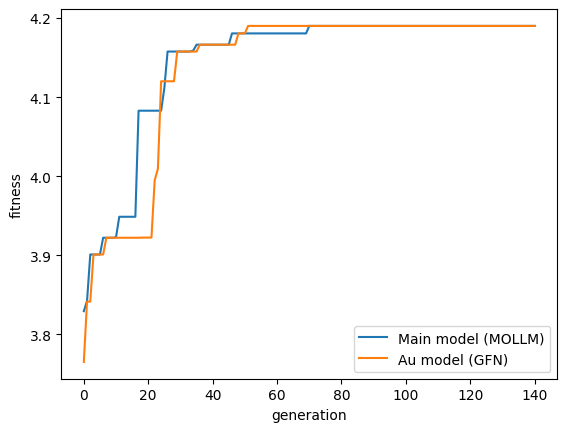

In [2]:
import matplotlib.pyplot as plt
seed = 42
filename = f"/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results_main/sa_drd2_qed_gsk3b_jnk3_0716_gfn_{seed}.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = f"/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results_au/sa_drd2_qed_gsk3b_jnk3_0716_gfn_{seed}.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
key_name = 'avg_top1'
#key_name = 'div'
for i in range(len(file['results'])):
    top1a.append(file['results'][i][key_name])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][key_name])


plt.plot(top1a[:3000],label='Main model (MOLLM)')
plt.plot(top1b[:3000],label='Au model (GFN)') 
plt.xlabel('generation')
plt.ylabel('fitness')
plt.legend()
plt.show()

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
def fix_xy(x,y):
    new_x = []
    new_y = []

    for i in range(len(x) - 1):
        new_x.append(x[i])
        new_y.append(y[i])

        # 当前和下一个之间是否有断档（步长100）
        gap = x[i + 1] - x[i]
        if gap > 100:
            # 补上中间的点，间隔100
            for inter_x in range(x[i] + 100, x[i + 1], 100):
                new_x.append(inter_x)
                new_y.append(y[i])  # 用当前值补上

    # 加上最后一个点
    new_x.append(x[-1])
    new_y.append(y[-1])
    return new_x,new_y
def read_files_as_array(root,keyname,file_num=3,molopt=False):
    arrays = []
    xs = []
    seed = 42
    for i in range(file_num):
        filename = root.format(seed+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        array = []
        x = []
        if molopt:
            for j in range(len(file)):
                array.append(file[j][keyname])
                x.append(file[j]['n_oracles'])
            x,array = fix_xy(x,array)
        else:
            for j in range(len(file['results'])):
                array.append(file['results'][j][keyname])
                x.append(file['results'][j]['all_unique_moles'])
        arrays.append(array)
        xs.append(x)
    return xs,arrays

def plot_mean_std(root,keyname,label,file_num = 5,color='blue',molopt=False):
    # step 1: 裁剪为最短长度（也可以插值到相同长度）
    xs,arrays = read_files_as_array(root,keyname,file_num=file_num,molopt=molopt)
    min_len = min([len(arr) for arr in arrays])
    print('min len',min_len)
    arrays = [arr[:min_len] for arr in arrays]
    xs = np.array([arr[:min_len] for arr in xs])
    xs = xs.mean(axis=0)
    
    # step 2: 叠在一起构成二维数组 (3, min_len)
    all_arrs = np.vstack(arrays)

    # step 3: 计算均值和标准差
    mean = np.mean(all_arrs, axis=0)
    
    std = np.std(all_arrs, axis=0)
    plt.plot(xs, mean, color=color, label=label, linewidth=2)
    plt.fill_between(xs, mean - std, mean + std, color=color, alpha=0.3,)

colors = [
    'tomato',        # 略带橘调的红色
    'royalblue',     # 稳重明亮的蓝色
    'seagreen',      # 温柔的绿色
    'darkorange',    # 强烈而有活力的橙色
    'mediumpurple',  # 淡雅的紫色
    'gold',          # 明亮金黄，像荧光笔
    'deepskyblue',   # 鲜艳清新的蓝色
    'hotpink',       # 活泼的粉色
    'slategray',     # 稳重的灰蓝色
    'olivedrab'      # 复古绿调
]
root = '/home/hp/src/genetic_gfn/multi_objective/genetic_gfn/results/results_{}.json'


min len 50
min len 49
min len 124
min len 50
min len 50
min len 50
min len 78
min len 50
min len 49
min len 123


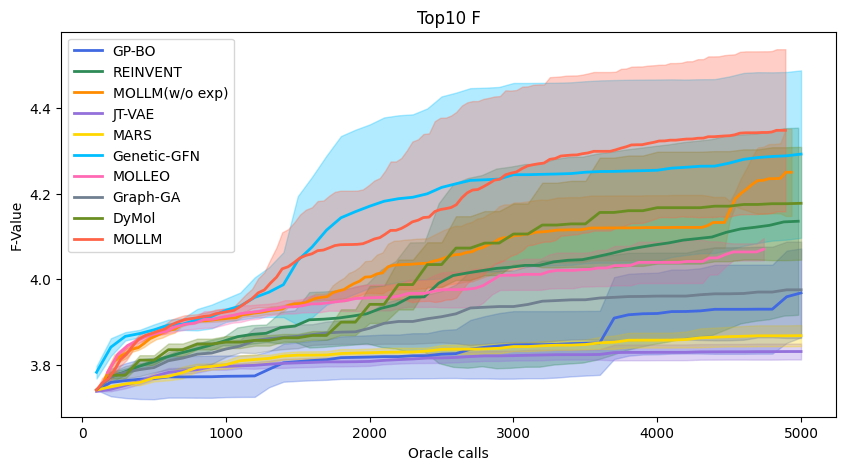

In [61]:
keyname = 'avg_top10'
plt.figure(figsize=(10, 5))

root = '/home/hp/src/mol_opt/main/gpbo/results/results_gp_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='GP-BO',color=colors[1],molopt=True)

root = '/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='REINVENT',color=colors[2],molopt=True)

root = '/home/hp/src/mollm_results/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507__{}.json'
plot_mean_std(root,keyname,label='MOLLM(w/o exp)',color=colors[3],file_num=3)

root = '/home/hp/src/mol_opt/main/jt_vae/results/results_jt_vae_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='JT-VAE',color=colors[4],molopt=True)

root = '/home/hp/src/mol_opt/main/mars/results/results_mars_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='MARS',color=colors[5],molopt=True)

root = '/home/hp/src/genetic_gfn/multi_objective/genetic_gfn/results/results+_2_{}.json'
plot_mean_std(root,keyname,label='Genetic-GFN',color=colors[6],molopt=True)

root = "/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{}random1.json"
plot_mean_std(root,keyname,file_num=3,label='MOLLEO',color=colors[7],molopt=True)

root = "/home/hp/src/mol_opt/main/graph_ga/results/results_graph_ga_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json"
plot_mean_std(root,keyname,file_num=3,label='Graph-GA',color=colors[8],molopt=True)

root = "/home/hp/src/dymol/main/reinvent_cl/results/results_reinvent_CL_qed:1+sa:1+drd2:1+jnk3:1+gsk3b:1_{}.json"
plot_mean_std(root,keyname,file_num=5,label='DyMol',color=colors[9],molopt=True)

root = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json'
plot_mean_std(root,keyname,file_num=5,label='MOLLM',color=colors[0])

import matplotlib.pyplot as plt
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.3_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
for i in range(len(file['results'])):
    top1a.append(file['results'][i][keyname])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][keyname])


#plt.plot(top1a,label='with exp with mols 0.3 ')
#plt.plot(top1b,label='with exp with mols 0.5 ')


plt.title(f'Top10 F')
plt.xlabel('Oracle calls')
plt.ylabel('F-Value')
plt.legend()
#plt.grid(True)
plt.show()


min len 114
min len 89


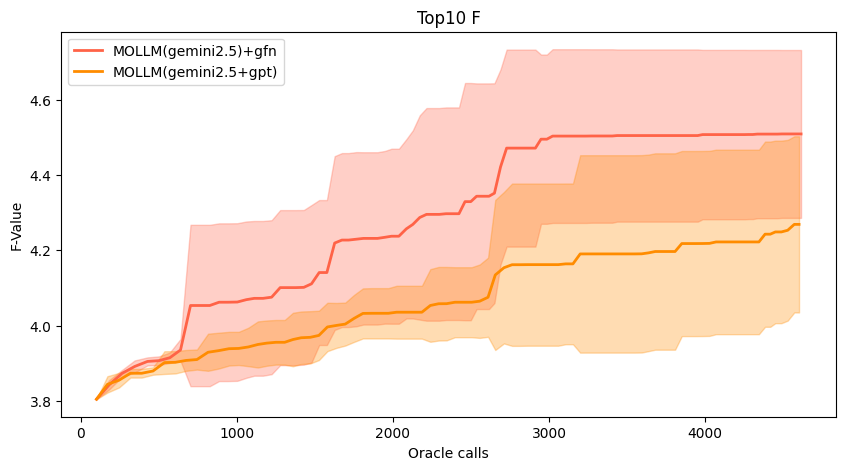

In [204]:
keyname = 'avg_top1'
plt.figure(figsize=(10, 5))


root = '/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0722_newcode_{}.json'
plot_mean_std(root,keyname,label='MOLLM(gemini2.5)+gfn',color=colors[0],file_num=5)

root = '/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0716_two_llm_{}.json'
plot_mean_std(root,keyname,label='MOLLM(gemini2.5+gpt)',color=colors[3],file_num=5)


#root = '/home/hp/src/mollm_results/coevol/zgca,gemini-2.5-flash-preview-04-17-nothinking/results/sa_drd2_qed_gsk3b_jnk3_0704_coevol_{}.json'
#plot_mean_std(root,keyname,label='MOLLM(gemini2.5) coevol',color=colors[0],file_num=1)


plt.title(f'Top10 F')
plt.xlabel('Oracle calls')
plt.ylabel('F-Value')
plt.legend()
#plt.grid(True)
plt.show()


In [41]:
names = ['qed','jnk3','drd2','gsk3b','mestranol_similarity','albuterol_similarity',
        'thiothixene_rediscovery','celecoxib_rediscovery', 'troglitazone_rediscovery',
        'perindopril_mpo','ranolazine_mpo','sitagliptin_mpo','amlodipine_mpo',
        'fexofenadine_mpo','osimertinib_mpo', 'zaleplon_mpo','median1','median2', 
        'deco_hop', 'scaffold_hop','isomers_c7h8n2o2','isomers_c9h10n2o2pf2cl',
        'valsartan_smarts' ]
scores = []
for name in names:
    path = f'/home/hp/src/mollm_results/pmo/zhongzhuan,gpt-4o-2024-05-13/results/{name}_0507_exp0.5_random1_42.json'
    with open(path,'r') as f:
        file = json.load(f)
    print(name,file['results'][-1]['top10_auc'])
    scores.append(file['results'][-1]['top10_auc'])
print('sum',np.sum(scores))

qed 0.9426521899090347
jnk3 0.8220799999999999
drd2 0.9722383186044946
gsk3b 0.8361350000000001
mestranol_similarity 0.9040998871830443
albuterol_similarity 0.9816193766053602
thiothixene_rediscovery 0.5474290047230849
celecoxib_rediscovery 0.8687195992723143
troglitazone_rediscovery 0.3413830743072949
perindopril_mpo 0.6456676785721628
ranolazine_mpo 0.8432987063569599
sitagliptin_mpo 0.58682935071416
amlodipine_mpo 0.7051840773889158
fexofenadine_mpo 0.8558163594472182
osimertinib_mpo 0.8879460554864432
zaleplon_mpo 0.5706560581983994
median1 0.3388596524728898
median2 0.3027950851019834
deco_hop 0.6223846529031811
scaffold_hop 0.14509451151776045
isomers_c7h8n2o2 0.9774975202827846
isomers_c9h10n2o2pf2cl 0.8929083485209274
valsartan_smarts 0.0
sum 15.591294507568414


In [42]:
from tdc import Oracle

for name in ['qed','sa','drd2','jnk3','gsk3b']:
    oracle = Oracle(name=name)
    print(f'{name} ,score:',oracle('N#Cc1ncn(-c2ccc(F)cc2F)n1'))

Found local copy...


qed ,score: 0.708458563549478


Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Found local copy...


sa ,score: 2.4566023495731475
drd2 ,score: 0.00092762715103974


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when usin

jnk3 ,score: 0.0
gsk3b ,score: 0.01


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [43]:
import os
import json
root = '/home/hp/src/mollm_results/pmo/zhongzhuan,gpt-4o-2024-05-13/results'
files = os.listdir(root)
for filename in files:
    with open(os.path.join(root,filename),'r') as f:
        file = json.load(f)
    print(filename,file['results'][-1]['top10_auc'])

celecoxib_rediscovery_0507_exp0.5_random1_42.json 0.8687195992723143
median1_0507_exp0.5_random1_42.json 0.3388596524728898
gsk3b_0507_exp0.5_random1_42.json 0.8361350000000001
isomers_c9h10n2o2pf2cl_0507_exp0.5_random1_42.json 0.8929083485209274
zaleplon_mpo_0507_exp0.5_random1_42.json 0.5706560581983994
jnk3_0507_exp0.5_random1_42.json 0.8220799999999999
amlodipine_mpo_0507_exp0.5_random1_42.json 0.7051840773889158
perindopril_mpo_0507_exp0.5_random1_42.json 0.6456676785721628
osimertinib_mpo_0507_exp0.5_random1_42.json 0.8879460554864432
thiothixene_rediscovery_0507_exp0.5_random1_42.json 0.5474290047230849
isomers_c7h8n2o2_0507_exp0.5_random1_42.json 0.9774975202827846
ranolazine_mpo_0507_exp0.5_random1_42.json 0.8432987063569599
deco_hop_0507_exp0.5_random1_42.json 0.6223846529031811
qed_0507_exp0.5_random1_42.json 0.9426521899090347
median2_0507_exp0.5_random1_42.json 0.3027950851019834
valsartan_smarts_0507_exp0.5_random1_42.json 0.0
fexofenadine_mpo_0507_exp0.5_random1_42.json 

In [48]:
import yaml
def save_mols_molopt():
    for j in range(2):
        seed = 42+j
        output_file_path = f"/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{seed}random1.yaml"
        save_name = f'/home/hp/src/admet/molleo_{seed}.csv'
        with open(output_file_path, 'r') as f:
            mol_buffer = yaml.unsafe_load(f)
        mol_buffer
        smis = []
        scores = []
        i = 0
        for key,value in mol_buffer.items():
            smis.append(key)
            scores.append(value[0])
            i+= 1
            if i==100:
                break
        final_csv = pd.DataFrame({'smiles':smis,'scores':scores}).sort_values(by='scores',ascending=False).reset_index(drop=True)
        final_csv.to_csv(save_name,index=False)
save_mols_molopt()

In [49]:
import os
seed = 1
output_file_path = f"/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{seed}.yaml"
with open(output_file_path, 'r') as f:
    mol_buffer = yaml.unsafe_load(f)
len(mol_buffer)

3668

In [50]:
from tdc.generation import MolGen
data = MolGen(name='ZINC')
moles_df = data.get_data()
zinc_smiles = moles_df.smiles.values.tolist()
len(zinc_smiles)

Found local copy...
Loading...
Done!


249455

In [244]:
import json
import os
import numpy as np
import pickle
from tqdm import tqdm
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0527_random1_non_repeat_{}.pkl"
file_num = 3

def novelty(smiles):
    repeat = 0
    for smi in tqdm(smiles):
        if smi in zinc_smiles:
            repeat +=1
    return 1-repeat/len(smiles)
def cal_novelty(root,file_num):
    nos = []
    for i in range(file_num):

        filename = root.format(44+i)
        with open(os.path.join(root,filename),'rb') as f:
            file = pickle.load(f)
        print(file.keys())
        all_mols = [j[0] for j in file['all_mols']]
        top100 = sorted(all_mols, key=lambda p: p.total, reverse=True)[:100]
        smiles = [j.value for j in top100]
           
        print(smiles)
        nos.append(novelty(smiles))
    print('mean novelty:',np.mean(nos))
cal_novelty(root,file_num)


dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])
['CN(C)C(=O)c1ccc(Nc2cc(F)ccn2)cc1C(N)=O', 'NC(=O)c1cc(Nc2cc(Br)ccn2)ccc1Cl', 'CN(C)C(=O)c1ccnc(Nc2ccc(F)c(C(N)=O)c2)c1', 'CN(C)C(=O)c1ccnc(Nc2ccc(Cl)c(C(N)=O)c2)c1', 'NC(=O)c1cc(Nc2cc(Cl)ccn2)ccc1Cl', 'NC(=O)c1cc(Nc2cc(F)ccn2)ccc1Cl', 'CN(C)C(=O)c1ccc(Nc2cc(Cl)ccn2)cc1C(N)=O', 'NC(=O)c1ccc(Nc2cc(F)ccn2)cc1Cl', 'COc1ccc(Nc2cc(F)c(C(N)=O)cn2)cc1Cl', 'COc1ccc(Nc2cc(Cl)ccn2)cc1C(N)=O', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1F', 'CNC(=O)c1cccc(Nc2cc(Br)ccn2)c1', 'COc1ccc(Nc2cc(F)ccn2)cc1C(N)=O', 'COc1ccc(Nc2cc(Cl)c(F)cn2)cc1C(N)=O', 'NC(=O)c1cc(Nc2cc(F)ccn2)ccc1F', 'CNC(=O)c1cc(Nc2cc(F)ccn2)ccc1OC', 'CNC(=O)c1cc(Nc2cc(F)c(OC)cn2)ccc1OC', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1OC', 'COc1ccc(Nc2cc(C(N)=O)c(Cl)cn2)cc1', 'CN(C)C(=O)c1cc(Nc2cc(Br)ccn2)ccc1C(N)=O', 'COc1ccc(Nc2cc(C(N)=O)c(F)cn2)cc1Cl', 'COc1ccc(Nc2cc(Cl)c(C(N)=O)cn2)cc1Cl', 'CNC(=O)c1cc(Nc2cc(Cl)cc

100%|██████████| 100/100 [00:00<00:00, 675.08it/s]


dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])
['COc1ccccc1NC(=O)Cc1cccc2ccccc12', 'COc1ccccc1NC(=O)Cc1cccc2cnccc12', 'Cc1ccccc1NC(=O)Cc1cccc2cnccc12', 'COc1cccc(NC(=O)Cc2cccc3ccccc23)c1OC', 'Cc1ccccc1NC(=O)Cc1cccc2ccccc12', 'COc1ccc(Cl)cc1NC(=O)Cc1cccc2cnccc12', 'COc1ccc(C)cc1NC(=O)Cc1cccc2cnccc12', 'COc1cc(C)ccc1NC(=O)Cc1cccc2cnccc12', 'COc1ccc(C#N)c(NC(=O)Cc2cccc3ccccc23)c1', 'COc1cccc(NC(=O)Cc2cccc3ccccc23)c1CO', 'COc1ccc(NC(=O)Cc2cccc3ccccc23)c(C#N)c1', 'COc1cccc(NC(=O)Cc2cccc3cnccc23)c1Cl', 'COc1ccc(O)cc1NC(=O)Cc1cccc2ccccc12', 'Cc1ccc(S(C)(=O)=O)cc1NC(=O)Cc1cccc2ccccc12', 'Cc1cccc(NC(=O)Cc2cccc3ccccc23)c1S(C)(=O)=O', 'COc1cccc(NC(=O)Cc2cccc3ccccc23)c1S(C)(=O)=O', 'COc1cc(C)c(NC(=O)Cc2cccc3cnccc23)cc1Cl', 'CS(=O)(=O)c1ccccc1NC(=O)Cc1cccc2cnccc12', 'COc1ccc(C#N)c(NC(=O)Cc2cccc3cnccc23)c1', 'Cc1ccc(S(C)(=O)=O)c(NC(=O)Cc2cccc3ccccc23)c1', 'Cc1cccc(NC(=O)Cc2cccc3cnccc23)c1S(C)(=O)=O', 'Cc1cc(Br)ccc1NC(=O)Cc1cccc2cnccc12', 'CO

100%|██████████| 100/100 [00:00<00:00, 648.80it/s]


dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])
['COc1cc(Nc2ccccc2C(N)=O)ccc1F', 'COc1ccc(Nc2ccccc2F)cc1C(N)=O', 'COc1ccc(Nc2ccc(Cl)cc2C(F)(F)F)cc1C(N)=O', 'NC(=O)c1ccc(Nc2ccccc2F)cc1Br', 'NC(=O)c1ccccc1Nc1cc(Cl)ccc1C(F)(F)F', 'NC(=O)c1ccc(Nc2ccccc2F)cc1Cl', 'NC(=O)c1ccccc1Nc1ccc(Cl)c(F)c1', 'COc1ccc(Nc2ccccc2C(N)=O)cc1Cl', 'NC(=O)c1ccccc1Nc1ccc(Cl)cc1', 'NC(=O)c1cc(Nc2ccccc2F)ccc1Cl', 'COc1ccc(Nc2ccccc2Cl)cc1C(N)=O', 'NC(=O)c1ccccc1Nc1ccc(C(F)(F)F)c(Cl)c1', 'NC(=O)c1ccc(Nc2ccccc2F)cc1F', 'NC(=O)c1cc(Nc2ccccc2C(F)(F)F)ccc1Cl', 'NC(=O)c1ccc(Nc2ccccc2C(F)(F)F)cc1Cl', 'N#Cc1cc(Nc2ccccc2C(N)=O)ccc1Cl', 'NC(=O)c1ccccc1Nc1ccc(F)cc1', 'NC(=O)c1cc(Nc2ccccc2Cl)ccc1C(F)(F)F', 'NC(=O)c1cc(Nc2ccccc2Br)ccc1Cl', 'NC(=O)c1cc(Nc2ccccc2F)ccc1F', 'COc1ccc(Nc2ccccc2F)c(C(N)=O)c1', 'COc1ccc(Nc2ccc(Cl)cc2F)cc1C(N)=O', 'N#Cc1ccc(Nc2ccccc2F)cc1C(N)=O', 'N#Cc1cc(Nc2ccccc2F)ccc1C(N)=O', 'NC(=O)c1cc(Nc2ccccc2Cl)ccc1F', 'NC(=O)c1cc(Nc2ccccc2F)ccc1Br', 'N#

100%|██████████| 100/100 [00:00<00:00, 737.12it/s]

mean novelty: 1.0


### mean property values

In [ ]:
import tdc
properties = ['sa','drd2','gsk3b','qed','jnk3']
score_functions = [tdc.Oracle(name=name) for name in properties]

Found local copy...
Found local copy...
Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


3.0699830653570395
0.00018312657267238256
0.03
0.8521001018812191
0.0


In [131]:
import os
output_file_path = "/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{}random1.yaml"
smis = []
raw_scores = []
for j in range(1):
    path = output_file_path.format(43+j)
    with open(path, 'r') as f:
        mol_buffer = yaml.unsafe_load(f)
    for i,key in enumerate(mol_buffer.keys()):
        print(mol_buffer[key][0])
        smis.append(key)
        score = []
        for s in score_functions:
            score.append(s(key))
        raw_scores.append(score)
        if i == 99:
            break
raw_scores = np.array(raw_scores)
raw_scores.shape,raw_scores.mean(axis = 0)

4.194693042000529
4.194693042000529
4.1221878331506
4.11947229614209
3.991812449289494
3.991812449289494
3.9865674744855832
3.9865674744855832
3.9813400045760714
3.9813400045760714
3.9490043084903803
3.9490043084903803
3.9473662726944725
3.9473662726944725
3.947327399029839
3.947327399029839
3.944716103979369
3.943031388176056
3.943031388176056
3.9417022606350423
3.9417022606350423
3.9408575386200537
3.940815126043512
3.940815126043512
3.9395759758933435
3.9395759758933435
3.939574753810786
3.939574753810786
3.9388576748212576
3.938564618460509
3.938564618460509
3.934974749005876
3.934974749005876
3.9345325377155342
3.9345325377155342
3.933920001729291
3.9338030815894625
3.9322281202761618
3.9322281202761618
3.9320979950549564
3.9320979950549564
3.9318537464040313
3.9318537464040313
3.931781500009885
3.931781500009885
3.931773410621576
3.931773410621576
3.9317355275186205
3.931577648726261
3.931577648726261
3.9303728854660402
3.9303728854660402
3.928753290167573
3.928753290167573
3.928

((100, 5),
 array([1.86077370e+00, 8.54261412e-04, 1.34000000e-02, 9.18579336e-01,
        1.33100000e-01]))

In [126]:
raw_scores.mean(axis = 0)

array([1.87820760e+00, 1.10955980e-03, 1.22400000e-02, 8.95531099e-01,
       2.35420000e-01])

In [122]:
def read_scores(root):
    init_scores = []
    scores = []
    totals = []
    for i in range(4):
        path = root.format(43+i)
        with open(path,'rb') as f:
            file = pickle.load(f)
        print(file['properties'])
        mols = [p[0] for p in file['all_mols']]
        mols = sorted(mols, key=lambda item: item.total, reverse=True)[:100]
        for p in mols:
            scores.append(p.raw_scores)
            totals.append(p.total)
    for i in file['init_pops']:
        init_scores.append(i.raw_scores)
    return np.array(scores),np.array(init_scores)
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
final_scores,init_scores = read_scores(path)
np.mean(final_scores,axis=0),np.mean(init_scores,axis=0)

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']


(array([1.98952931e+00, 1.14787364e-03, 8.27836442e-01, 6.84500000e-02,
        6.45600000e-01]),
 array([3.02145175, 0.00866239, 0.73042698, 0.0263    , 0.015     ]))

In [116]:
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
top100 = []
for i in range(5):
    new_path = path.format(42+i)
    with open(new_path,'rb') as f:
        file = pickle.load(f)
    file.keys()
    print(file['evaluation'][-1])
    top100.append(file['evaluation'][-1]['avg_top100'])
np.mean(top100)

{'all_unique_moles': 4999, 'llm_calls': 2956, 'Uniqueness': 0.9141891892036843, 'Validity': 0.9133445946092323, 'avg_top1': 4.205417728616168, 'avg_top10': 4.19297755993123, 'avg_top100': 4.136325547737391, 'top1_auc': 4.071591843485419, 'top10_auc': 4.0260973582797845, 'top100_auc': 3.9457257071666434, 'hypervolume': 0.9167041125795712, 'div': 0.5065259789363821, 'generated_num': 5920}
{'all_unique_moles': 4999, 'llm_calls': 3189, 'Uniqueness': 0.8467324870950114, 'Validity': 0.9210155148219691, 'avg_top1': 4.275178619230402, 'avg_top10': 4.263413852272373, 'avg_top100': 4.175312803322001, 'top1_auc': 4.038853330752092, 'top10_auc': 3.9969197612916783, 'top100_auc': 3.92022582591177, 'hypervolume': 0.7653261793943613, 'div': 0.48363673287428804, 'generated_num': 6381}
{'all_unique_moles': 4999, 'llm_calls': 3111, 'Uniqueness': 0.8744581795032175, 'Validity': 0.9120244020048123, 'avg_top1': 4.201602881077445, 'avg_top10': 4.178595293181132, 'avg_top100': 4.147566611280366, 'top1_auc': 

4.262377803026081

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3OC', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3C(=O)N(C)C']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3OC', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3C(=O)N(C)C', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1OC', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1Cl']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=C2)cc1Cl', 'NC(=O)c1ccc(cc1OC)NC2=NC=CC(Cl)=C2', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3OC', 'O=C(Cc1cccc2ccccc12)Nc3ccccc3C(=O)N(C)C', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1OC', 'NC(=O)c1ccc(Nc2nccc(Cl)c2)cc1Cl', 'O=C(Cc1cccc2ccccc12)Nc1ccccc1C(=O)OC', 'O=C(Cc1cccc2ccccc12)Nc1ccncc1C(=O)OC']
['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']
['NC(=O)c1ccc(NC2=NC=CC(N(C)C)=

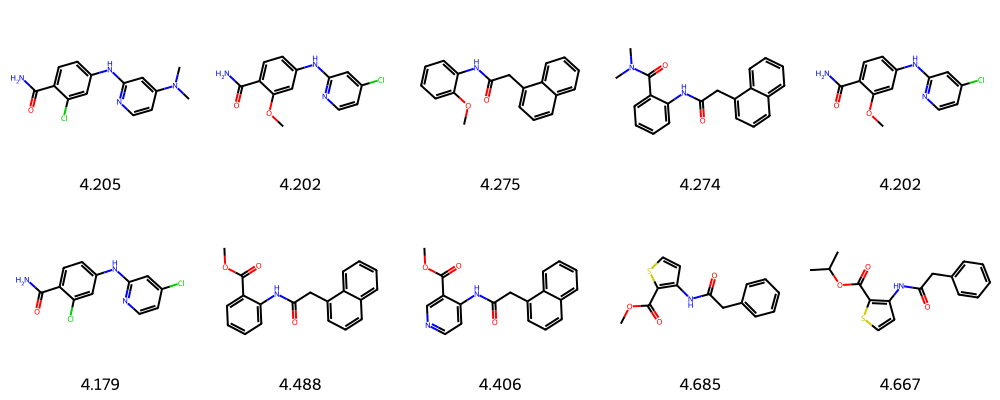

In [174]:
from rdkit import Chem
from rdkit.Chem import Draw


def read_mols(root):
    smis = []
    scores = []
    num_per_file = 2
    for i in range(5):
        path = root.format(42+i)
        with open(path,'rb') as f:
            file = pickle.load(f)
        print(file['properties'])
        mols = [p[0] for p in file['all_mols']]
        mols = sorted(mols, key=lambda item: item.total, reverse=True)
        tmp_smis = []
        pre_score = 0
        for m in mols:
            if len(tmp_smis) == num_per_file:
                break
            if m.total!=pre_score:
                tmp_smis.append(m.value)
                scores.append(m.total)
                pre_score = m.total
        smis.extend(tmp_smis)
        print(smis)
    return smis,scores
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
smiles_list, f_values = read_mols(path)
print(f'mean scores {np.mean(f_values)}')

def plot_mols(smiles_list,f_values):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

    # Create legends with F values
    legends = [f"{f_values[i]:.3f}" for i in range(len(mols))]

    # Draw molecules in a grid with legends
    img = Draw.MolsToGridImage(
        mols,
        molsPerRow=5,
        subImgSize=(200, 200),
        legends=legends
    )
    return img
img = plot_mols(smiles_list,f_values)
img

[4.122848317680034, 4469]
[3.9742893741492944, 4333]
[4.300224890645433, 4800]
[4.280054044481174, 4441]
[4.584552932109015, 2827]
[4.579819939729197, 3275]
[4.064827401726978, 4898]
[4.038556856027412, 4450]
[4.078366332062088, 4580]
[3.99808272349886, 4624]


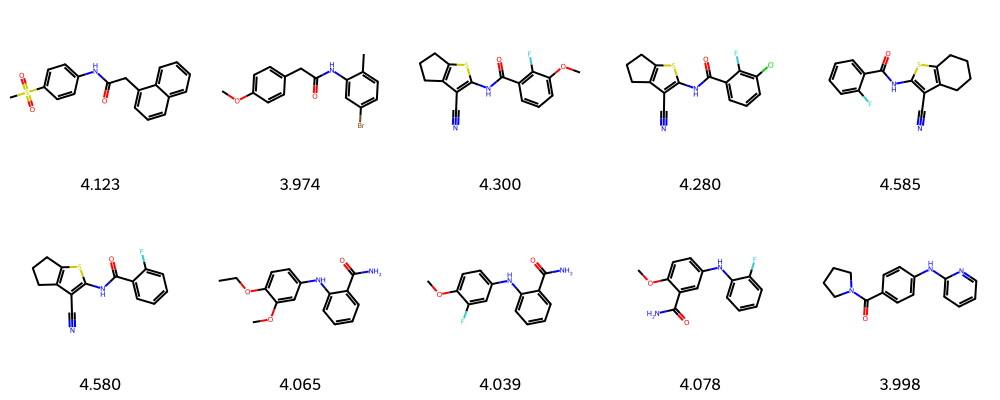

In [180]:
import os
root = "/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.yaml"

def read_mols_opt(root):
    smis = []
    scores = []
    mols_per_file = 2
    for j in range(5):
        path = root.format(42+j)
        with open(path, 'r') as f:
            mol_buffer = yaml.unsafe_load(f)
        tmp_smis = []
        pre_score = 0
        for i,key in enumerate(mol_buffer.keys()):
            print(mol_buffer[key])
            if mol_buffer[key][0] != pre_score:
                tmp_smis.append(key)
                scores.append(mol_buffer[key][0])
                pre_score = mol_buffer[key][0]
            if len(tmp_smis) == mols_per_file:
                break
        smis.extend(tmp_smis)
    return smis,scores
smis,scores = read_mols_opt(root)
plot_mols(smis,scores)


In [194]:
def read_mols(root,seed ):
    smis = []
    scores = []
    num_per_file = 100
    for i in range(1):
        path = root.format(seed+i)
        with open(path,'rb') as f:
            file = pickle.load(f)
        print(file['properties'])
        mols = [p[0] for p in file['all_mols']]
        mols = sorted(mols, key=lambda item: item.total, reverse=True)
        tmp_smis = []
        pre_score = 0
        for m in mols:
            if len(tmp_smis) == num_per_file:
                break
            if m.total!=pre_score:
                tmp_smis.append(m.value)
                scores.append(m.total)
                pre_score = m.total
        smis.extend(tmp_smis)
    return smis,scores
seed = 46
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
smis,scores = read_mols(path,seed)
save_name =  f'/home/hp/src/admet/gpt_4o_{seed}.csv'
final_csv = pd.DataFrame({'smiles':smis,'scores':scores})
final_csv.to_csv(save_name,index=False)

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']


In [223]:
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0527_random1_non_repeat_44.pkl'
with open(path,'rb') as f:
    file = pickle.load(f)
print(file['properties'])
mols = [p[0] for p in file['all_mols']]
mols = sorted(mols, key=lambda item: item.total, reverse=True)

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']


In [97]:
import os

def get_file_sizes(folder_path):
    file_sizes = []

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            filepath = os.path.join(root, filename)
            try:
                size = os.path.getsize(filepath)
                file_sizes.append((filepath, size))
            except OSError:
                pass  # 忽略无法访问的文件

    # 按照大小从大到小排序
    file_sizes.sort(key=lambda x: x[1], reverse=True)

    return file_sizes

# 使用方法：替换为你自己的路径
folder = "/home/hp/src/MOLLM/genetic_gfn"  # 替换成你要分析的文件夹路径
results = get_file_sizes(folder)

# 输出前 20 个最大文件（可以改数量）
for filepath, size in results[:20]:
    print(f"{filepath} - {size / 1024 / 1024:.2f} MB")


/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/docked_mols.h5 - 93.17 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/drd2_current.pkl - 33.78 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/gsk3b_current.pkl - 26.50 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/genetic_gfn/data/Prior.ckpt - 15.92 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/genetic_gfn/data/mols_filtered.smi - 10.74 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/jnk3_current.pkl - 10.38 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/oracle/fpscores.pkl - 8.63 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/pretrained_proxy/info.pkl - 2.86 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/pretrained_proxy/best_params.pkl - 2.67 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/data/pretrained_proxy/params.pkl - 2.67 MB
/home/hp/src/MOLLM/genetic_gfn/multi_objective/genetic_gfn/results/results_2_genetic_gfn_5_44.yaml - 1.67 MB
/home/hp/src/MOLLM/genetic_gfn/multi_

In [1]:
import numpy as np
import random
from pathlib import Path
import json
from constellaration import problems
from constellaration.geometry import surface_rz_fourier
from constellaration import forward_model

from algorithm.base import Item
import datasets
from pprint import pprint
import pandas as pd
def convert2str(r_cos,z_sin):
    r_cos = np.array2string(r_cos, separator=', ', precision=8, suppress_small=True, max_line_width=1000)
    z_sin = np.array2string(z_sin, separator=', ', precision=8, suppress_small=True, max_line_width=1000)

    # 拼接为完整字符串
    final_string = (
    "r_cos = np.array(" + r_cos + ")\n\n"
    "z_sin = np.array(" + z_sin + ")"
    )
    return final_string

def evaluate_surface(r_cos,z_sin):
    surface = surface_rz_fourier.SurfaceRZFourier(r_cos=r_cos,z_sin=z_sin,
                                                  r_sin=None,   
                                                  z_cos=None,
                                                  n_field_periods=3,  
                                                  is_stellarator_symmetric=True)
    result,metrics = problems.MHDStableQIStellarator().evaluate([surface],return_metrics=True)
    return result,metrics


with Path('/home/hp/src/fusion/mhd_stable_results.json').open("r") as f:
    data = json.load(f)
    data = data['boundary_json']
    data = json.loads(data)
data

['{"r_cos":[[0.0,0.0,0.0,0.0,0.9996110108014289,0.029068583938282107,-0.01732450061040664,-0.0025691172398730833,-0.00004411236271275745],[0.001119533566420795,0.005949520921478428,0.0022506934672929576,-0.07805054065308431,0.15200927475708392,-0.026008183047928773,-0.0049652572120014995,-0.0010041564747019394,-0.00041253875228109587],[-0.0015987592195103291,-0.004438060087024405,0.012813952307086747,0.03347079294989239,0.0025851907317521626,-0.007831230159560592,-0.0006358328242114858,0.0001264120932773676,-0.0002873505021137912],[0.0005618194247825092,0.0011997537092924917,-0.00592991689259575,-0.00737229403098998,0.003471999727054977,0.0003125105971191856,0.0009990514136076242,-0.0013878001477519773,0.00022300393520928539],[0.00020267867187956907,0.0006891834341956619,0.00011253008807855923,-0.00004523252942448894,0.00007458476766855447,0.00019125103000287229,0.00008346769662383404,-0.0006181273497974449,0.0001944006479917402]],"z_sin":[[0.0,0.0,0.0,0.0,0.0,-0.1217947075545678,-0.00

In [ ]:
with Path('/home/hp/src/fusion/simple_to_build_results.json').open("r") as f:
    data = json.load(f)
    data = data['boundary_json']
    data = json.loads(data)
surface = surface_rz_fourier.SurfaceRZFourier(r_cos=data['r_cos'],z_sin=data['z_sin'],
                                                  r_sin=None,   
                                                  z_cos=None,
                                                  n_field_periods=3,  
                                                  is_stellarator_symmetric=True)
result,metrics = problems.SimpleToBuildQIStellarator().evaluate(surface,return_metrics=True)

{'r_cos': [[0.0,
   0.0,
   0.0,
   0.0,
   0.9995178921549264,
   0.011618353662622018,
   -0.022784245937336037,
   -0.001105234359532037,
   -0.00010048552046607593],
  [0.00033086672469337717,
   0.002044137757423993,
   0.0015508792395665751,
   -0.05101916626176067,
   0.11083626544718325,
   -0.019195180240048012,
   -0.0028224787674325,
   0.0003443724464856931,
   -0.00020279078133320267],
  [-0.000514463856875108,
   -1.6111160043768283e-05,
   -0.003470985053406113,
   0.007203967188014792,
   -0.007869729312781406,
   -0.000975715486603981,
   0.0018292840569966264,
   -0.00010719298677724405,
   -0.00013101835967481087],
  [0.00026032737922126895,
   -0.0014116233349178036,
   -0.0009880929825074342,
   0.0003742248333152744,
   0.002350188922773059,
   -0.001373725638484113,
   0.00022028646165902542,
   -0.00039176583802806066,
   0.00019511083761679428],
  [2.176460584533377e-05,
   -0.0001695921171825402,
   0.0004315418725850898,
   0.00016706585728977128,
   -0.00018

In [13]:
items = []
from tqdm import tqdm
for d in tqdm(data):
    value = json.loads(d)
    r_cos = np.array(value['r_cos'])
    z_sin = np.array(value['z_sin'])
    print(r_cos.shape,z_sin.shape)
    results_dict = {}
    result,metrics = evaluate_surface(r_cos,z_sin)
    metrics = metrics[0]
    results_dict['original_results'] = {'l_delta_b':metrics.minimum_normalized_magnetic_gradient_scale_length,
                                        'aspect_ratio':metrics.aspect_ratio}
    results_dict['transformed_results'] = {'l_delta_b': -metrics.minimum_normalized_magnetic_gradient_scale_length/20,
                                        'aspect_ratio':metrics.aspect_ratio/20}
    results_dict['constraint_results'] = {'edge_rotational_transform_over_n_field_periods':metrics.edge_rotational_transform_over_n_field_periods,
                                            'qi':metrics.qi,
                                            'edge_magnetic_mirror_ratio':metrics.edge_magnetic_mirror_ratio,
                                            'vacuum_well':metrics.vacuum_well,
                                            'flux_compression_in_regions_of_bad_curvature':metrics.flux_compression_in_regions_of_bad_curvature,
                                            'feasibility':result.feasibility[0]}
    results_dict['overall_score'] = result.score
    item = Item(convert2str(r_cos,z_sin),['l_delta_b','aspect_ratio'])
    item.assign_results(results_dict)
    items.append(item)

  0%|          | 0/4 [00:00<?, ?it/s]

(5, 9) (5, 9)


 25%|██▌       | 1/4 [01:29<04:27, 89.20s/it]

metrics: aspect_ratio=6.024777758360145 aspect_ratio_over_edge_rotational_transform=7.910515969517924 max_elongation=7.5328821032468145 axis_rotational_transform_over_n_field_periods=0.22303608913744397 edge_rotational_transform_over_n_field_periods=0.2538720938716594 axis_magnetic_mirror_ratio=0.24505231645380093 edge_magnetic_mirror_ratio=0.2758955636348202 average_triangularity=0.4906186224611687 vacuum_well=0.008448247748032094 minimum_normalized_magnetic_gradient_scale_length=2.97859432214493 qi=0.0003241591934073665 flux_compression_in_regions_of_bad_curvature=0.8723419101348012
(5, 9) (5, 9)


 50%|█████     | 2/4 [02:19<02:12, 66.41s/it]

metrics: aspect_ratio=9.97796869711918 aspect_ratio_over_edge_rotational_transform=13.058385730469796 max_elongation=4.519359658345383 axis_rotational_transform_over_n_field_periods=0.2278952154895081 edge_rotational_transform_over_n_field_periods=0.25470143357350006 axis_magnetic_mirror_ratio=0.22278054670516692 edge_magnetic_mirror_ratio=0.24505434720017413 average_triangularity=0.17395266434709883 vacuum_well=0.00024313355119075678 minimum_normalized_magnetic_gradient_scale_length=8.459092136241324 qi=0.0002668743260762091 flux_compression_in_regions_of_bad_curvature=0.8821442438268907
(5, 9) (5, 9)


/home/hp/miniconda3/envs/fusion/lib/python3.10/site-packages/constellaration/mhd/geometry_utils.py:127: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  phi_perp = float(optimize.fsolve(_dot_tangent, x0=[phi_init])[0])
 75%|███████▌  | 3/4 [03:10<00:59, 59.52s/it]

metrics: aspect_ratio=7.934314023953283 aspect_ratio_over_edge_rotational_transform=10.351612000515795 max_elongation=5.106835932224218 axis_rotational_transform_over_n_field_periods=0.2634853875344516 edge_rotational_transform_over_n_field_periods=0.255493670085971 axis_magnetic_mirror_ratio=0.21720911525066064 edge_magnetic_mirror_ratio=0.2482981032498405 average_triangularity=0.23171856143921582 vacuum_well=0.0009689032959121566 minimum_normalized_magnetic_gradient_scale_length=5.601926188693859 qi=0.00031947637563427685 flux_compression_in_regions_of_bad_curvature=0.8812650678407817
(5, 9) (5, 9)


100%|██████████| 4/4 [04:12<00:00, 63.12s/it]

metrics: aspect_ratio=11.95183306114229 aspect_ratio_over_edge_rotational_transform=15.883038379152481 max_elongation=4.269231778696085 axis_rotational_transform_over_n_field_periods=0.253906914902837 edge_rotational_transform_over_n_field_periods=0.2508301156624593 axis_magnetic_mirror_ratio=0.1925102583227838 edge_magnetic_mirror_ratio=0.21491637718493029 average_triangularity=0.1203435136543132 vacuum_well=-0.00020945240730585454 minimum_normalized_magnetic_gradient_scale_length=11.131091191568611 qi=0.00026542441638353345 flux_compression_in_regions_of_bad_curvature=0.8670569700519237


In [17]:
i = 1
items[i].property,items[i].total,items[i].constraints

({'l_delta_b': 8.459092136241324, 'aspect_ratio': 9.97796869711918},
 94.79931748624435,
 {'edge_rotational_transform_over_n_field_periods': 0.25470143357350006,
  'qi': 0.0002668743260762091,
  'edge_magnetic_mirror_ratio': 0.24505434720017413,
  'vacuum_well': 0.00024313355119075678,
  'flux_compression_in_regions_of_bad_curvature': 0.8821442438268907,
  'feasibility': 0.0})

In [ ]:
import pickle

# 保存 items 到文件
with open('/home/hp/src/MOLLM/problem/fusion/best_items.pkl', 'wb') as f:
    pickle.dump(items, f)

: 

## Problem 2 simple to build

In [ ]:
def generate_initial_population(config,seed=42):
    ds = datasets.load_dataset(
    "proxima-fusion/constellaration",
    split="train",
    num_proc=4,
    )
    ds = ds.select_columns([c for c in ds.column_names
                            if c.startswith("boundary.")
                            or c.startswith("metrics.")])
    ds = ds.filter(
        lambda x: x == 3,
        input_columns=["boundary.n_field_periods"],
        num_proc=4,
    )
    ml_ds = ds.remove_columns([
        "boundary.n_field_periods", "boundary.is_stellarator_symmetric",  # all same value
        "boundary.r_sin", "boundary.z_cos",  # empty
        "boundary.json", "metrics.json", "metrics.id",  # not needed
    ])
    df = ml_ds.to_pandas()
    problem = problems.SimpleToBuildQIStellarator()
    feasibilities = []
    feasible_metrics = []
    violations = []
    for _,row in df.iterrows():
        metrics = forward_model.ConstellarationMetrics(
            aspect_ratio=row['metrics.aspect_ratio'],
            aspect_ratio_over_edge_rotational_transform=row['metrics.aspect_ratio_over_edge_rotational_transform'],
            axis_rotational_transform_over_n_field_periods=row['metrics.axis_rotational_transform_over_n_field_periods'],
            axis_magnetic_mirror_ratio=row['metrics.axis_magnetic_mirror_ratio'],
            average_triangularity=row['metrics.average_triangularity'],
            edge_rotational_transform_over_n_field_periods=row['metrics.edge_rotational_transform_over_n_field_periods'],
            qi=row['metrics.qi'],
            edge_magnetic_mirror_ratio=row['metrics.edge_magnetic_mirror_ratio'],
            max_elongation=row['metrics.max_elongation'],
            minimum_normalized_magnetic_gradient_scale_length=row['metrics.minimum_normalized_magnetic_gradient_scale_length'],
            flux_compression_in_regions_of_bad_curvature=row['metrics.flux_compression_in_regions_of_bad_curvature'],
            vacuum_well=row['metrics.vacuum_well'],
        )
        if problem.is_feasible(metrics):
            feasible_metrics.append(metrics)
        feasibilities.append(problem.compute_feasibility(metrics))
        violations.append(problem._normalized_constraint_violations(metrics))
    df['feasibility'] = feasibilities
    df = df.sort_values('feasibility',ascending=True).reset_index(drop=True)
    return df
df = generate_initial_population(None)

Using the latest cached version of the dataset since proxima-fusion/constellaration couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/hp/.cache/huggingface/datasets/proxima-fusion___constellaration/default/0.0.0/d5e4e9c98e7470b502cd68a3c98b7e702d39683a (last modified on Fri Aug  8 17:25:20 2025).


In [20]:
df= df[:100]
items = []
for _,row in df.iterrows():
    results_dict = {
        'original_results': {
            'l_delta_b': row['metrics.minimum_normalized_magnetic_gradient_scale_length']/20,
        },
        'transformed_results': {
            'l_delta_b': row['metrics.minimum_normalized_magnetic_gradient_scale_length']/20,
        },
        'constraint_results': {
            'edge_rotational_transform_over_n_field_periods':row['metrics.edge_rotational_transform_over_n_field_periods'],
            'qi':row['metrics.qi'],
            'edge_magnetic_mirror_ratio':row['metrics.edge_magnetic_mirror_ratio'],
            'aspect_ratio': row['metrics.aspect_ratio'],
            'max_elongation':row['metrics.max_elongation']
        },
        
    }
    if row['feasibility'] <= 0.01:
        results_dict['overall_score'] =  1-row['metrics.minimum_normalized_magnetic_gradient_scale_length']
    else:
        results_dict['overall_score'] = 0
    r_cos = np.stack(row['boundary.r_cos'])
    z_sin = np.stack(row['boundary.z_sin'])
    item = Item(convert2str(r_cos,z_sin),['l_delta_b'])
    item.assign_results(results_dict)
    items.append(item)

### make initial pop for problem 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from pymoo.indicators.hv import HV
# 示例 df（你可以替换为你自己的数据）
# 假设你要最大化 var1，最小化 var2
def plot_pareto(df, var1, var2, df2=None):
    # 将目标统一为最小化（对 var1 取负）
    F = np.column_stack([-df[var1], df[var2]])

    # 非支配排序
    nds = NonDominatedSorting()
    pareto_indices = nds.do(F, only_non_dominated_front=True)

    # 提取非支配前沿点
    pareto_front = F[pareto_indices]

    # Hypervolume 计算
    ref_point = np.array([1.0, 20.0])
    hv_calc = HV(ref_point=ref_point)
    hv_total = hv_calc.do(pareto_front)

    # 可视化
    plt.figure(figsize=(5,5))

    # 所有点：灰色
    plt.scatter(df[var1], df[var2], color='lightgray', label='Other Points')

    # 非支配点：红色
    plt.scatter(df.loc[pareto_indices, var1], df.loc[pareto_indices, var2],
                c='red', label='Pareto Front')

    # 如果提供了 df2，则用星号画出
    if df2 is not None:
        plt.scatter(df2[var1], df2[var2], color='blue', marker='*', s=150, label='DF2 Points')

    # 设置标签和标题
    plt.xlabel(f"{var1} (maximize)")
    plt.ylabel(f"{var2} (minimize)")
    plt.title(f"Pareto Front Visualization (HV = {hv_total:.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pareto_indices

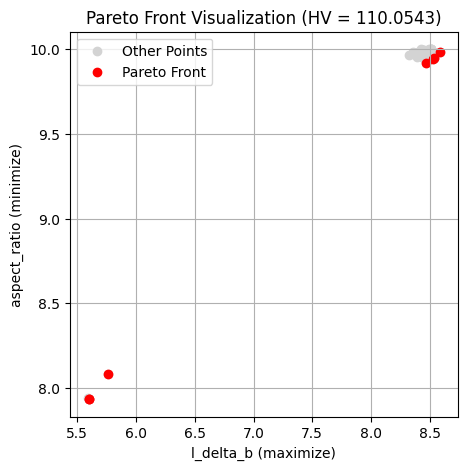

array([  1,  22,  45,  67,  93, 112, 131])

In [5]:
import pickle
with open('/home/hp/src/mollm_results/fusion/zgca,gemini-2.5-flash-nothinking/mols/l_delta_b_aspect_ratio_0807_42.pkl','rb') as f:
    results = pickle.load(f)
with open('/home/hp/src/mollm_results/fusion/zgca,gemini-2.5-flash-nothinking/mols/l_delta_b_aspect_ratio_0807_43.pkl','rb') as f:
    results2 = pickle.load(f)
all_mols = [i[0] for i in results['all_mols'] if i[0].constraints['feasibility']<=0.01 and i[0].property['aspect_ratio']<=10]
all_mols.extend([i[0] for i in results2['all_mols'] if i[0].constraints['feasibility']<=0.01 and i[0].property['aspect_ratio']<=10] )
var1 = [i.property['l_delta_b'] for i in all_mols]
var2 = [i.property['aspect_ratio'] for i in all_mols]
result_df = pd.DataFrame({'l_delta_b':var1,'aspect_ratio':var2})
pareto_indices = plot_pareto(result_df,'l_delta_b','aspect_ratio')
all_mols = all_mols[:49]
pareto_indices

In [7]:
all_mols[0].value

'r_cos = np.array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.99961101,  0.02200591, -0.02196503, -0.00218531, -0.00066803],\n [ 0.00128119,  0.00130131, -0.00511019, -0.0449518 ,  0.11276824, -0.01989959, -0.00467699, -0.00157488,  0.00015132],\n [-0.00065677,  0.00249896,  0.00366617,  0.00686682, -0.00115421, -0.00598912,  0.00272868, -0.00044712,  0.00012706],\n [ 0.00035349, -0.0008385 ,  0.00143419, -0.00128419,  0.00213637,  0.00122658, -0.00084633,  0.00060644, -0.00018936],\n [-0.00013534, -0.00013192,  0.00050514,  0.00029265,  0.00020774, -0.00037842,  0.00045895, -0.00020861,  0.00002   ]])\n\nz_sin = np.array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        , -0.21103885,  0.00987074,  0.00240866, -0.00006602],\n [-0.00069451, -0.0018436 , -0.01551187, -0.08026744, -0.11410404,  0.02742345, -0.00318846,  0.00031174,  0.00001046],\n [ 0.0002042 ,  0.00104531,  0.00312704, -0.01574668, -0.00269767, -0.00246685,  0.00031565,  0.00025973, -0.000303

In [8]:
from pathlib import Path
import json
with Path('/home/hp/src/fusion/simple_to_build_results.json').open("r") as f:
    data = json.load(f)
    data = data['boundary_json']
    data = json.loads(data)
r_cos = np.array(data['r_cos'])
z_sin = np.array(data['z_sin'])
from algorithm.base import Item
def convert2str(r_cos,z_sin):
    r_cos = np.array2string(r_cos, separator=', ', precision=8, suppress_small=True, max_line_width=1000)
    z_sin = np.array2string(z_sin, separator=', ', precision=8, suppress_small=True, max_line_width=1000)

    # 拼接为完整字符串
    final_string = (
    "r_cos = np.array(" + r_cos + ")\n\n"
    "z_sin = np.array(" + z_sin + ")"
    )
    return final_string

all_mols.append(Item(convert2str(r_cos,z_sin),['l_delta_b']))


In [11]:
for i in range(len(all_mols)):
    all_mols[i].property_list = ['l_delta_b']

In [12]:
with open('/home/hp/src/MOLLM/problem/simple2build/init_items.pkl', 'wb') as f:
    pickle.dump(all_mols, f)

## Problem 3

In [71]:
import numpy as np
import random
from pathlib import Path
import pickle
from constellaration import problems
from constellaration.geometry import surface_rz_fourier
from constellaration import forward_model

from algorithm.base import Item
import datasets
from pprint import pprint
import pandas as pd
from concurrent.futures import ProcessPoolExecutor, as_completed
import multiprocessing
def convert2str(r_cos,z_sin):
    r_cos = np.array2string(r_cos, separator=', ', precision=8, suppress_small=True, max_line_width=1000)
    z_sin = np.array2string(z_sin, separator=', ', precision=8, suppress_small=True, max_line_width=1000)

    # 拼接为完整字符串
    final_string = (
    "r_cos = np.array(" + r_cos + ")\n\n"
    "z_sin = np.array(" + z_sin + ")"
    )
    return final_string


def generate_initial_population(config,seed=42):
    ds = datasets.load_dataset(
    "proxima-fusion/constellaration",
    split="train",
    num_proc=4,
    )
    ds = ds.select_columns([c for c in ds.column_names
                            if c.startswith("boundary.")
                            or c.startswith("metrics.")])
    ds = ds.filter(
        lambda x: x == 3,
        input_columns=["boundary.n_field_periods"],
        num_proc=4,
    )
    ml_ds = ds.remove_columns([
        "boundary.n_field_periods", "boundary.is_stellarator_symmetric",  # all same value
        "boundary.r_sin", "boundary.z_cos",  # empty
        "boundary.json", "metrics.json", "metrics.id",  # not needed
    ])
    df = ml_ds.to_pandas()
    problem = problems.MHDStableQIStellarator()
    feasibilities = []
    feasible_metrics = []
    violations = []
    for _,row in df.iterrows():
        metrics = forward_model.ConstellarationMetrics(
            aspect_ratio=row['metrics.aspect_ratio'],
            aspect_ratio_over_edge_rotational_transform=row['metrics.aspect_ratio_over_edge_rotational_transform'],
            axis_rotational_transform_over_n_field_periods=row['metrics.axis_rotational_transform_over_n_field_periods'],
            axis_magnetic_mirror_ratio=row['metrics.axis_magnetic_mirror_ratio'],
            average_triangularity=row['metrics.average_triangularity'],
            edge_rotational_transform_over_n_field_periods=row['metrics.edge_rotational_transform_over_n_field_periods'],
            qi=row['metrics.qi'],
            edge_magnetic_mirror_ratio=row['metrics.edge_magnetic_mirror_ratio'],
            max_elongation=row['metrics.max_elongation'],
            minimum_normalized_magnetic_gradient_scale_length=row['metrics.minimum_normalized_magnetic_gradient_scale_length'],
            flux_compression_in_regions_of_bad_curvature=row['metrics.flux_compression_in_regions_of_bad_curvature'],
            vacuum_well=row['metrics.vacuum_well'],
        )
        if problem.is_feasible(metrics):
            feasible_metrics.append(metrics)
        feasibilities.append(problem.compute_feasibility(metrics))
        violations.append(problem._normalized_constraint_violations(metrics))
    df['feasibility'] = feasibilities
    df = df.sort_values('feasibility',ascending=True).reset_index(drop=True)
    df= df[:300]
    items = []
    for _,row in df.iterrows():
        results_dict = {}
        results_dict['original_results'] = {'l_delta_b':row['metrics.minimum_normalized_magnetic_gradient_scale_length'],
                                                    'aspect_ratio':row['metrics.aspect_ratio']}
        results_dict['transformed_results'] = {'l_delta_b': -row['metrics.minimum_normalized_magnetic_gradient_scale_length']/20,
                                            'aspect_ratio':row['metrics.aspect_ratio']/20}
        results_dict['constraint_results'] = {'edge_rotational_transform_over_n_field_periods':row['metrics.edge_rotational_transform_over_n_field_periods'],
                                                'qi':row['metrics.qi'],
                                                'edge_magnetic_mirror_ratio':row['metrics.edge_magnetic_mirror_ratio'],
                                                'vacuum_well':row['metrics.vacuum_well'],
                                                'flux_compression_in_regions_of_bad_curvature':row['metrics.flux_compression_in_regions_of_bad_curvature'],
                                                'feasibility':row['feasibility']}
        results_dict['overall_score'] = 0
        r_cos = np.stack(row['boundary.r_cos'])
        z_sin = np.stack(row['boundary.z_sin'])
        item = Item(convert2str(r_cos,z_sin),['l_delta_b','aspect_ratio'])
        item.assign_results(results_dict)
        items.append(item)
   
    return items,df
items, df = generate_initial_population(None)    
df

Using the latest cached version of the dataset since proxima-fusion/constellaration couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/hp/.cache/huggingface/datasets/proxima-fusion___constellaration/default/0.0.0/d5e4e9c98e7470b502cd68a3c98b7e702d39683a (last modified on Fri Aug  8 17:25:20 2025).


,metrics.aspect_ratio,metrics.aspect_ratio_over_edge_rotational_transform,metrics.average_triangularity,metrics.axis_magnetic_mirror_ratio,metrics.axis_rotational_transform_over_n_field_periods,metrics.edge_magnetic_mirror_ratio,metrics.edge_rotational_transform_over_n_field_periods,metrics.flux_compression_in_regions_of_bad_curvature,metrics.max_elongation,metrics.minimum_normalized_magnetic_gradient_scale_length,metrics.qi,metrics.vacuum_well,boundary.r_cos,boundary.z_sin,feasibility
0,9.723457,12.078013,-0.078032,0.236322,0.126043,0.277928,0.268351,0.612928,3.830054,5.667771,0.001625,-0.011105,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.066794318474306, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.2137555138641050...",0.203133
1,11.559542,13.780332,0.366782,0.242600,0.165179,0.277171,0.279615,1.047106,5.389934,7.057227,0.001681,-0.006597,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.06415330613581363...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.4205966928051372...",0.207274
2,11.842437,19.339948,-0.119561,0.253660,0.135431,0.291079,0.204110,0.759825,4.725291,3.690700,0.001717,-0.009159,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.08054318247923772...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.1502753348316202...",0.209928
3,10.249672,17.383032,0.369578,0.235453,0.108517,0.266589,0.196546,1.094908,5.446208,2.270241,0.000435,-0.003114,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.03113300718305553...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.3123666231289821...",0.216564
4,10.587958,16.484716,-0.068988,0.270161,0.152589,0.307158,0.214096,0.998241,5.713068,0.478868,0.000806,-0.011668,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.05573960942680250...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.3159903516796081...",0.228632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,11.709461,27.006985,-0.007148,0.215014,0.104651,0.257082,0.144524,0.766908,4.987797,0.002232,0.006924,-0.027013,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.12842521798244863...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.0665401013449049...",0.421905
296,9.633584,10.957601,0.082893,0.286570,0.308597,0.355483,0.293056,1.201658,4.664009,5.022599,0.007192,-0.024350,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.1993996759704689,...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.2796911462620733...",0.421931
297,10.208704,19.167472,-0.063298,0.232763,0.206163,0.288178,0.177535,1.099222,3.681577,4.852437,0.008702,-0.042230,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.04874098686898031...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.0864965906708377...",0.422304
298,10.061873,17.438290,0.132395,0.313319,0.193484,0.355622,0.192333,1.051363,6.023409,1.015810,0.005735,-0.032389,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.1331168404126634,...","[[0.0, 0.0, 0.0, 0.0, 0.0, -0.0643367192585932...",0.422487


In [72]:
df.columns

Index(['metrics.aspect_ratio',
       'metrics.aspect_ratio_over_edge_rotational_transform',
       'metrics.average_triangularity', 'metrics.axis_magnetic_mirror_ratio',
       'metrics.axis_rotational_transform_over_n_field_periods',
       'metrics.edge_magnetic_mirror_ratio',
       'metrics.edge_rotational_transform_over_n_field_periods',
       'metrics.flux_compression_in_regions_of_bad_curvature',
       'metrics.max_elongation',
       'metrics.minimum_normalized_magnetic_gradient_scale_length',
       'metrics.qi', 'metrics.vacuum_well', 'boundary.r_cos', 'boundary.z_sin',
       'feasibility'],
      dtype='object')

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from pymoo.indicators.hv import HV
# 示例 df（你可以替换为你自己的数据）
# 假设你要最大化 var1，最小化 var2
def plot_pareto(df, var1, var2, df2=None):
    # 将目标统一为最小化（对 var1 取负）
    F = np.column_stack([-df[var1], df[var2]])

    # 非支配排序
    nds = NonDominatedSorting()
    pareto_indices = nds.do(F, only_non_dominated_front=True)

    # 提取非支配前沿点
    pareto_front = F[pareto_indices]

    # Hypervolume 计算
    ref_point = np.array([1.0, 20.0])
    hv_calc = HV(ref_point=ref_point)
    hv_total = hv_calc.do(pareto_front)

    # 计算每个 Pareto 点的 HVC
    hvc_values = []
    for i in range(len(pareto_front)):
        front_minus_i = np.delete(pareto_front, i, axis=0)
        hv_minus_i = hv_calc.do(front_minus_i)
        hvc = hv_total - hv_minus_i
        hvc_values.append(hvc)

    # 将 HVC 加到 df 中
    df_result = df.copy()
    df_result['HVC'] = np.nan
    df_result.loc[pareto_indices, 'HVC'] = hvc_values

    # 可视化
    plt.figure(figsize=(5,5))

    # 所有点：灰色
    plt.scatter(df[var1], df[var2], color='lightgray', label='Other Points')

    # 非支配点：红色
    plt.scatter(df.loc[pareto_indices, var1], df.loc[pareto_indices, var2],
                c='red', label='Pareto Front')

    # 如果提供了 df2，则用星号画出
    if df2 is not None:
        plt.scatter(df2[var1], df2[var2], color='blue', marker='*', s=150, label='DF2 Points')

    # 设置标签和标题
    plt.xlabel(f"minimum_normalized_magnetic_gradient_scale_length (maximize)")
    plt.ylabel(f"{var2} (minimize)")
    plt.title(f"Pareto Front Visualization (HV = {hv_total:.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_result, hv_total
var1 = 'metrics.minimum_normalized_magnetic_gradient_scale_length'
var2 = 'metrics.aspect_ratio'
plot_pareto(df,var1,var2)

NameError: name 'df' is not defined

In [54]:
import pickle 
with open('/home/hp/src/MOLLM/problem/fusion/best_items.pkl','rb') as f:
    start = pickle.load(f)
start = [i for i in start if i.constraints['feasibility']<0.01]
var1 = [i.property['l_delta_b'] for i in start]
var2 = [i.property['aspect_ratio'] for i in start]
values = [i.value for i in start]
start_df = pd.DataFrame({'l_delta_b':var1,'aspect_ratio':var2,'value':values})
start_df

FileNotFoundError: [Errno 2] No such file or directory: '/home/hp/src/MOLLM/problem/fusion/best_items.pkl'

In [55]:
import pickle 
with open('/home/hp/src/mollm_results/fusion/zgca,gemini-2.5-flash-nothinking/mols/l_delta_b_aspect_ratio_0807_43.pkl','rb') as f:
    start = pickle.load(f)['all_mols']
start = [i[0] for i in start if i[0].constraints['feasibility']<0.01]
var1 = [i.property['l_delta_b'] for i in start]
var2 = [i.property['aspect_ratio'] for i in start]
second_df = pd.DataFrame({'l_delta_b':var1,'aspect_ratio':var2})
second_df

FileNotFoundError: [Errno 2] No such file or directory: '/home/hp/src/mollm_results/fusion/zgca,gemini-2.5-flash-nothinking/mols/l_delta_b_aspect_ratio_0807_43.pkl'

In [35]:
import pickle 
with open('/home/hp/src/mollm_results/fusion/zgca,gemini-2.5-flash-nothinking/mols/l_delta_b_aspect_ratio_0807_43.pkl','rb') as f:
    pkl = pickle.load(f)
pkl.keys()
all_mols = pkl['all_mols']
import pickle 
with open('/home/hp/src/mollm_results/fusion/zgca,gemini-2.5-flash-nothinking/mols/l_delta_b_aspect_ratio_0807_42.pkl','rb') as f:
    pkl = pickle.load(f)
pkl.keys()
all_mols42 = pkl['all_mols']

[5.589221138836368, 8.437423289866173, 8.4660495789417, 8.459717403620205, 8.44630557852803, 8.355036974407026, 8.401629699642825, 8.472868679900106, 5.601927250089929, 8.440604731842585, 8.429304207192963, 8.410368849064406, 8.414189111524873, 8.455424249391152, 8.463306148963206, 8.491609573463982, 8.395685246827385, 8.46039898039195, 8.476818519982231, 8.468409333889786, 8.447843710264307, 8.434666613146598, 8.507764537010404, 8.439909821973604, 8.492469933744097, 8.325892344791205, 8.359605766464277, 8.437280188342408, 8.424976477239934, 8.395553206552082, 8.38831006313369, 5.75898691954592, 8.473226447492682, 8.454004062876392, 8.457176753534366, 8.447836018960796, 8.445901096352998, 8.453616887867884, 8.441496512679665, 8.432524213064614, 8.434473301969371, 8.436110100587698, 8.440982229353398, 8.44580385946512, 9.029281371001826, 8.436156747324386, 8.503907760612826, 8.49430029421792, 8.495356616800628, 8.51885199741385, 8.419565719554186, 8.504172979580114, 8.464028256692295, 8

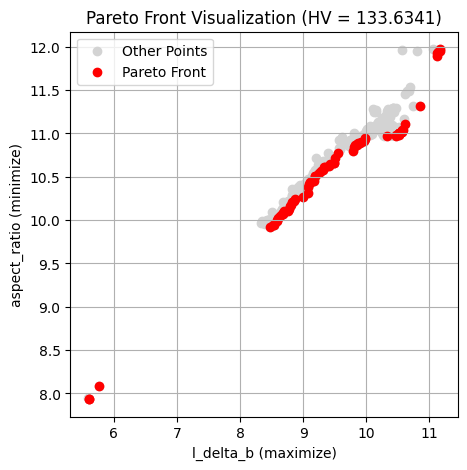

In [36]:
all_mols = [i[0] for i in all_mols if i[0].constraints['feasibility']<0.01]
all_mols42 = [i[0] for i in all_mols42 if i[0].constraints['feasibility']<0.01]

#all_mols = sorted(all_mols, key=lambda item: item[0].total, reverse=True)[:100]
var1 = [i.property['l_delta_b'] for i in all_mols]

var2 = [i.property['aspect_ratio'] for i in all_mols]
values = [i.value for i in all_mols]
hv = [i.total for i in all_mols]
var1.extend([i.property['l_delta_b'] for i in all_mols42]) 
var2.extend([i.property['aspect_ratio'] for i in all_mols42])
hv.extend([i.total for i in all_mols42])
values.extend([i.value for i in all_mols42])
print(var1,var2)
result_df = pd.DataFrame({'l_delta_b':var1,'aspect_ratio':var2,'hv':hv,'value':values})
result_df = result_df.sort_values('hv',ascending=False).reset_index(drop=True)
hvc_df,hv = plot_pareto(result_df,'l_delta_b','aspect_ratio',) # df2=start_df

In [37]:
hvc_df = hvc_df.loc[hvc_df['HVC'].notna()]
hvc_df = hvc_df.sort_values('HVC',ascending=False).reset_index(drop=True)
hvc_df.head()


,l_delta_b,aspect_ratio,hv,value,HVC
0,5.758987,8.083102,80.546157,"r_cos = np.array([[ 0. , 0. , 0. ...",0.287739
1,10.855731,11.310127,103.024796,"r_cos = np.array([[ 0. , 0. , 0. ...",0.138453
2,8.470021,9.915138,95.503857,"r_cos = np.array([[ 0. , 0. , 0. , ...",0.072761
3,9.792546,10.799389,99.298021,"r_cos = np.array([[ 0. , 0. , ...",0.011319
4,11.115891,11.887018,98.296006,"r_cos = np.array([[ 0. , 0. , 0. ...",0.008689


In [68]:
tmp_df = hvc_df[:100]
#tmp_df = pd.concat([start_df,tmp_df]).reset_index(drop=True)
tmp_df = tmp_df[1:2]
F = np.column_stack([-tmp_df['l_delta_b'], tmp_df['aspect_ratio']])

ref_point = np.array([1.0, 20.0])
hv_calc = HV(ref_point=ref_point)
hv_total = hv_calc.do(F)
hv_total

103.02479639835846

In [70]:
import json
def make_case(r_cos, z_sin):
    obj = {
        "r_cos": r_cos.tolist(),
        "z_sin": z_sin.tolist(),
        "r_sin": None,
        "z_cos": None,
        "n_field_periods": 3,
        "is_stellarator_symmetric": True
    }
    # 转成字符串（这里不缩进，确保和你贴的一样）
    return json.dumps(obj, ensure_ascii=False)

# 得到字符串数组
cases = []
for value in tmp_df.value:
    scope = {}
    exec(value, {"np": np}, scope)
    r_cos = scope["r_cos"]
    z_sin = scope["z_sin"]
    cases.append(make_case(r_cos, z_sin))

# 保存到文件
with open("fusion_mhd1.json", "w", encoding="utf-8") as f:
    json.dump(cases, f, ensure_ascii=False, indent=4)

print("保存完成！")

保存完成！


In [ ]:
import pandas as pd

def get_dominators(df1, df2):
    dominating_rows = []

    for _, p in df2.iterrows():
        # 找出 df1 中支配 p 的点
        mask = (df1['l_delta_b'] > p['l_delta_b']) & \
               (df1['aspect_ratio'] < p['aspect_ratio'])
        dominating_points = df1[mask]
        dominating_rows.append(dominating_points)

    # 合并所有支配点并去重
    if dominating_rows:
        dominating_df = pd.concat(dominating_rows).drop_duplicates().reset_index(drop=True)
    else:
        dominating_df = pd.DataFrame(columns=df1.columns)

    return dominating_df

# 示例：
# dominators = get_dominators(result_df, start_df)
# print(dominators)


d = get_dominators(result_df,start_df)
d

,l_delta_b,aspect_ratio,hv
0,8.460399,9.973172,94.857797
1,8.507765,9.946388,95.587377
2,8.492470,9.975250,95.159639
3,8.503908,9.972436,95.301043
4,8.508174,9.947231,95.583486
5,8.470021,9.915138,95.503857
6,8.526877,9.976276,95.494782
7,8.482780,9.973846,95.075811
8,8.459358,9.955217,95.017194
9,8.462548,9.952383,95.076059


In [ ]:
from main import main
args = main(['circle_n/config.yaml'])
args

Namespace(config='circle_n/config.yaml', resume=False, eval=False, seed=42, objectives=None, directions=None)

In [ ]:
from model.MOLLM import MOLLM
mollm = MOLLM(args.config,resume=args.resume,eval=args.eval,seed=args.seed,objectives=args.objectives,directions=args.directions)
ns = [31]
for i in ns:
    mollm.config.config['description'] = f'n = {i} circles in a unit square'
    mollm.config.config['save_suffix'] = f'circle_packing_{i}'
    mollm.config.config['n_circles'] = i

In [1]:
import pickle 
with open('/home/hp/src/MOLLM/problem/simple2build/init_items.pkl', 'rb') as f:
    a = pickle.load(f)
for i in a:
    print(a.property_list)

AttributeError: 'list' object has no attribute 'property_list'

In [2]:
property_list

NameError: name 'property_list' is not defined

In [ ]:
# 

### visualize simple2build results

In [51]:
import pickle 

with open('/root/src/mollm_results/fusion/zgca,gemini-2.5-flash-nothinking/mols/l_delta_b_feasibility_0813_simple2build_42.pkl','rb') as f:
    a = pickle.load(f)
all_mols = a['all_mols']
a.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

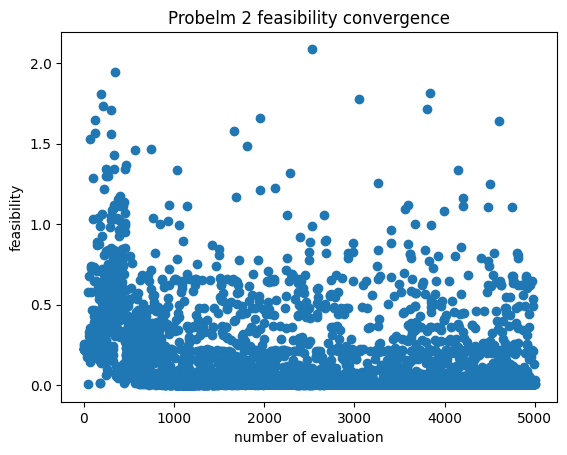

In [52]:
import matplotlib.pyplot as plt

feas = [i[0].property['feasibility'] for i in all_mols]
x = [i[1] for i in all_mols]
plt.xlabel('number of evaluation')
plt.ylabel('feasibility')
plt.title('Probelm 2 feasibility convergence')
plt.scatter(x,feas)

In [28]:
from model.util import *
front_mols = nsga2_so_selection([i[0] for i in all_mols],pop_size=50)
feas = [i[0].property['feasibility'] for i in all_mols]
pop_feas = [i.property['feasibility'] for i in a['final_pops']]
front_feas = [i.property['feasibility'] for i in front_mols]
print(front_feas)

[0.009032227466773124, 0.2581101926416701, 0.22642128183975777, 0.225271860558285, 0.2282719729501488, 0.2266928330125012, 0.22827253554757732, 0.22404280828450016, 0.24280889995989097, 0.2414906066209338, 0.2281144557913692, 0.22696392968631754, 0.23317358009598083, 0.22257914786587438, 0.23577739702917197, 0.2353030821669097, 0.2312461017989119, 0.22145677688971688, 0.2592933903523345, 0.2329721864774921, 0.24292986441906472, 0.23463612121121552, 0.2306258524295604, 0.23814640636236242, 0.22929263480492013, 0.014030908158017968, 0.014290330896007675, 0.01542285445882452, 0.029154376121527603, 0.042245064396573495, 0.047778477856421975, 0.04999711570657553, 0.05481405151449026, 0.06302985096785868, 0.0643655029258493, 0.0656151214617825, 0.06778245367908386, 0.06916667715010191, 0.07415818483499398, 0.07770430957381291, 0.07985510944856122, 0.07992250920226329, 0.0799992041242642, 0.08338147703115834, 0.08366577725394758, 0.08367225967372063, 0.08378480632846697, 0.09045627470734474, 

In [32]:
front_feas = sorted(front_feas)
feas = sorted(feas)[:50]
pop_feas = sorted(pop_feas)
for i in range(30):
    print(front_feas[i],feas[i],pop_feas[i])

0.009032227466773124 0.009032227466773124 0.009032227466773124
0.014030908158017968 0.014030908158017968 0.014030908158017968
0.014290330896007675 0.014290330896007675 0.014290330896007675
0.01542285445882452 0.01542285445882452 0.01542285445882452
0.029154376121527603 0.029154376121527603 0.029154376121527603
0.042245064396573495 0.042245064396573495 0.042245064396573495
0.047778477856421975 0.047778477856421975 0.047778477856421975
0.04999711570657553 0.04999711570657553 0.04999711570657553
0.05481405151449026 0.05481405151449026 0.05481405151449026
0.06302985096785868 0.06302985096785868 0.06302985096785868
0.0643655029258493 0.0643655029258493 0.0643655029258493
0.0656151214617825 0.0656151214617825 0.0656151214617825
0.06778245367908386 0.06778245367908386 0.06778245367908386
0.06916667715010191 0.06916667715010191 0.06916667715010191
0.07415818483499398 0.07415818483499398 0.07415818483499398
0.07770430957381291 0.07770430957381291 0.07770430957381291
0.07985510944856122 0.079855

In [44]:
all_mols = [i[0] for i in all_mols]
all_mols = sorted(all_mols,key=lambda x:x.total,reverse=True)
all_mols[0].total

0.4367098004623925

In [45]:
all_mols[0].value

'r_cos = np.array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.999755,  0.0111  , -0.0228  , -0.00106 , -0.000099],\n [ 0.00031 ,  0.00202 ,  0.00152 , -0.0509  ,  0.11    , -0.0189  , -0.0027  ,  0.00033 , -0.000205],\n [-0.000505, -0.00001 , -0.00344 ,  0.0071  , -0.00775 , -0.00095 ,  0.00182 , -0.000105, -0.000128],\n [ 0.00025 , -0.00141 , -0.00098 ,  0.00035 ,  0.00235 , -0.00134 ,  0.00022 , -0.00037 ,  0.000185],\n [ 0.000018, -0.00016 ,  0.000415,  0.00015 , -0.00018 , -0.00007 , -0.00009 ,  0.000026, -0.000008]])\n\nz_sin = np.array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      , -0.1915  ,  0.0135  ,  0.0005  , -0.00023 ],\n [ 0.0001  , -0.000015, -0.0072  , -0.085   , -0.1218  ,  0.0234  , -0.0031  ,  0.00108 ,  0.000009],\n [ 0.      ,  0.00061 ,  0.00205 , -0.0112  , -0.0038  ,  0.00039 , -0.000002,  0.00019 ,  0.00012 ],\n [-0.000055,  0.      ,  0.00143 ,  0.00037 ,  0.00075 ,  0.00067 , -0.0003  , -0.00023 ,  0.000055],\n [ 0.000099,  0.0002  ,  0.000149, 

In [47]:
import json


scope = {}
exec(all_mols[0].value, {"np": np}, scope)
r_cos = scope["r_cos"]
z_sin = scope["z_sin"]
obj = {
    "r_cos": r_cos.tolist(),
    "z_sin": z_sin.tolist(),
    "r_sin": None,
    "z_cos": None,
    "n_field_periods": 3,
    "is_stellarator_symmetric": True
}

# 保存到文件
with open("simple2build.json", "w", encoding="utf-8") as f:
    json.dump(obj, f, ensure_ascii=False, indent=4)

print("保存完成！")

保存完成！


## sacs

In [31]:
import pickle 
with open('/root/src/mollm_results/5goals/zgca,gemini-2.5-flash-nothinking/mols/sa_drd2_qed_gsk3b_jnk3_0828_noexp_44.pkl','rb') as f:
    a = pickle.load(f)
a.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [32]:
a['all_mols'][0][0].property

{'sa': 3.843395346780789,
 'drd2': 0.07788755375829483,
 'qed': 0.7834737872177223,
 'gsk3b': 0.04,
 'jnk3': 0.01}

(100, 3)


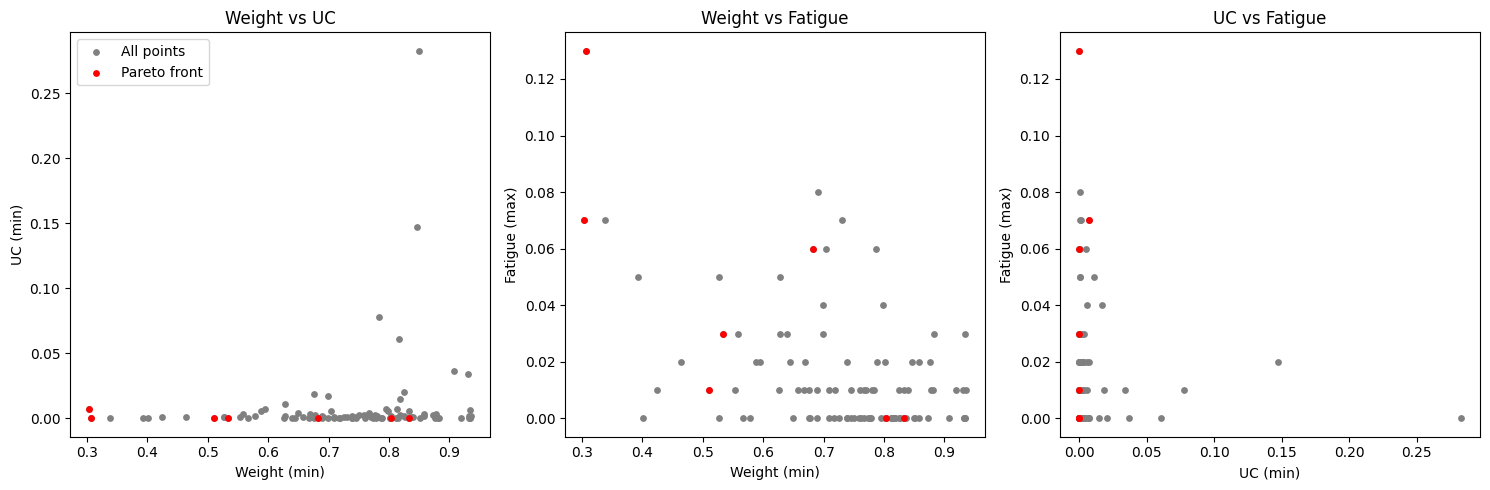

In [33]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [mol.property['qed'],
     mol.property['drd2'],
     mol.property['jnk3']]
    for mol in a['init_pops']
])
print(data.shape)
# 转换优化方向 (min, min, max → min, min, min)
transformed = np.copy(data)
transformed[:, 2] = -transformed[:, 2]

def is_pareto_efficient(costs):
    """返回 Pareto 前沿布尔掩码"""
    n_points = costs.shape[0]
    is_efficient = np.ones(n_points, dtype=bool)
    for i in range(n_points):
        if is_efficient[i]:
            is_efficient[is_efficient] = (
                np.any(costs[is_efficient] < costs[i], axis=1)
                | np.all(costs[is_efficient] == costs[i], axis=1)
            )
            is_efficient[i] = True
    return is_efficient

mask = is_pareto_efficient(transformed)

# 绘制 2D 投影
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# weight vs uc
axes[0].scatter(data[:,0], data[:,1], c='gray', s=15, label='All points')
axes[0].scatter(data[mask,0], data[mask,1], c='red', s=15, label='Pareto front')
axes[0].set_xlabel("Weight (min)")
axes[0].set_ylabel("UC (min)")
axes[0].set_title("Weight vs UC")
axes[0].legend()

# weight vs fatigue
axes[1].scatter(data[:,0], data[:,2], c='gray', s=15)
axes[1].scatter(data[mask,0], data[mask,2], c='red', s=15)
axes[1].set_xlabel("Weight (min)")
axes[1].set_ylabel("Fatigue (max)")
axes[1].set_title("Weight vs Fatigue")

# uc vs fatigue
axes[2].scatter(data[:,1], data[:,2], c='gray', s=15)
axes[2].scatter(data[mask,1], data[mask,2], c='red', s=15)
axes[2].set_xlabel("UC (min)")
axes[2].set_ylabel("Fatigue (max)")
axes[2].set_title("UC vs Fatigue")

plt.tight_layout()
plt.show()

In [1]:
import pickle
with open('/root/src/mollm_results/gcu/zgca,gemini-2.5-pro-thinking/mols/gcu_var_0904_42.pkl','rb') as f:
    a = pickle.load(f)
a.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [12]:
all_mols = sorted(a['all_mols'],key=lambda x:x[0].total,reverse=True)
all_mols[:3]

[[<algorithm.base.Item at 0x7fd3d4387b80>, 96],
 [<algorithm.base.Item at 0x7fd3d4386c80>, 84],
 [<algorithm.base.Item at 0x7fd3d4386c20>, 82]]

In [6]:
from algorithm.base import Item
items = []
code =r'''
#include <tops/tops_runtime.h>
#include <tops.h>

// 目标：更快的 1D 样本方差（torch.var, ddof=1）
// 关键优化：
// - 12 线程（小 N 自适应降线程），每线程处理连续大段
// - L3→L1 双缓冲异步 DTE，TILE=32768（128KB）保证搬运/计算重叠
// - 8 路向量累加（sum/sumsq）降低依赖链，满向量路径 + 标量尾处理
// - 线程间合并：一次性 Shared(L2)→Private(L1) 批量拷回再合并（减少小粒度 DTE 次数）
// - 全程使用 mdspan + DTE，L1 计算，__valigned__ 对齐，向量化 load/store

__global__ void kernel_var_opt(float *inp, float *out, size_t nr_elems) {
  const int tid = threadIdx.x;
  const int T   = blockDim.x;

  tops_dte_ctx_t ctx;
  tops::dte_scope scope(ctx);

  // 线程划分
  const size_t elems_per_thread = (nr_elems + (size_t)T - 1) / (size_t)T;
  const size_t start = (size_t)tid * elems_per_thread;
  size_t end = start + elems_per_thread;
  if (end > nr_elems) end = nr_elems;

  // 双缓冲 L1
  const int TILE = 32768; // 128KB
  __valigned__ float buf0[TILE];
  __valigned__ float buf1[TILE];

  const int VLEN = tops::vlength<vfloat>(); // 32

  // 8 路向量累加器
  auto vs0 = tops::vzero<vfloat>(), vs1 = tops::vzero<vfloat>();
  auto vs2 = tops::vzero<vfloat>(), vs3 = tops::vzero<vfloat>();
  auto vs4 = tops::vzero<vfloat>(), vs5 = tops::vzero<vfloat>();
  auto vs6 = tops::vzero<vfloat>(), vs7 = tops::vzero<vfloat>();
  auto vq0 = tops::vzero<vfloat>(), vq1 = tops::vzero<vfloat>();
  auto vq2 = tops::vzero<vfloat>(), vq3 = tops::vzero<vfloat>();
  auto vq4 = tops::vzero<vfloat>(), vq5 = tops::vzero<vfloat>();
  auto vq6 = tops::vzero<vfloat>(), vq7 = tops::vzero<vfloat>();

  float tail_sum = 0.f, tail_sqs = 0.f;

  if (start < end) {
    size_t i = start;

    int cur_len = (int)((end - i) < (size_t)TILE ? (end - i) : (size_t)TILE);
    tops::event ev = tops::memcpy_async(
      ctx,
      tops::mdspan(tops::Private, buf0, cur_len),
      tops::mdspan(tops::Global,  inp + i, cur_len)
    );
    i += cur_len;
    bool use0 = true;

    while (true) {
      bool has_next = (i < end);
      tops::event ev_next;
      int nxt_len = 0;
      if (has_next) {
        nxt_len = (int)((end - i) < (size_t)TILE ? (end - i) : (size_t)TILE);
        ev_next = tops::memcpy_async(
          ctx,
          tops::mdspan(tops::Private, use0 ? buf1 : buf0, nxt_len),
          tops::mdspan(tops::Global,  inp + i, nxt_len)
        );
        i += nxt_len;
      }

      tops::wait(ev);
      float *cur = use0 ? buf0 : buf1;
      const int n = cur_len;

      // 满向量路径：8*VLEN 展开
      int j = 0;
      int vec_n = (n / VLEN) * VLEN;
      #pragma unroll 2
      for (; j + 8*VLEN <= vec_n; j += 8*VLEN) {
        auto v0 = tops::vload<vfloat>(cur + j + 0*VLEN);
        auto v1 = tops::vload<vfloat>(cur + j + 1*VLEN);
        auto v2 = tops::vload<vfloat>(cur + j + 2*VLEN);
        auto v3 = tops::vload<vfloat>(cur + j + 3*VLEN);
        auto v4 = tops::vload<vfloat>(cur + j + 4*VLEN);
        auto v5 = tops::vload<vfloat>(cur + j + 5*VLEN);
        auto v6 = tops::vload<vfloat>(cur + j + 6*VLEN);
        auto v7 = tops::vload<vfloat>(cur + j + 7*VLEN);

        vs0 = tops::vadd(vs0, v0);
        vs1 = tops::vadd(vs1, v1);
        vs2 = tops::vadd(vs2, v2);
        vs3 = tops::vadd(vs3, v3);
        vs4 = tops::vadd(vs4, v4);
        vs5 = tops::vadd(vs5, v5);
        vs6 = tops::vadd(vs6, v6);
        vs7 = tops::vadd(vs7, v7);

        auto w0 = tops::vmul<vfloat>(v0, v0);
        auto w1 = tops::vmul<vfloat>(v1, v1);
        auto w2 = tops::vmul<vfloat>(v2, v2);
        auto w3 = tops::vmul<vfloat>(v3, v3);
        auto w4 = tops::vmul<vfloat>(v4, v4);
        auto w5 = tops::vmul<vfloat>(v5, v5);
        auto w6 = tops::vmul<vfloat>(v6, v6);
        auto w7 = tops::vmul<vfloat>(v7, v7);

        vq0 = tops::vadd(vq0, w0);
        vq1 = tops::vadd(vq1, w1);
        vq2 = tops::vadd(vq2, w2);
        vq3 = tops::vadd(vq3, w3);
        vq4 = tops::vadd(vq4, w4);
        vq5 = tops::vadd(vq5, w5);
        vq6 = tops::vadd(vq6, w6);
        vq7 = tops::vadd(vq7, w7);
      }
      for (; j + VLEN <= vec_n; j += VLEN) {
        auto v = tops::vload<vfloat>(cur + j);
        vs0 = tops::vadd(vs0, v);
        auto w = tops::vmul<vfloat>(v, v);
        vq0 = tops::vadd(vq0, w);
      }
      for (int k = vec_n; k < n; ++k) {
        float x = cur[k];
        tail_sum += x;
        tail_sqs += x * x;
      }

      if (!has_next) break;
      use0 = !use0;
      cur_len = nxt_len;
      ev = ev_next;
    }
  }

  // 水平落地到标量
  auto vs01 = tops::vadd(vs0, vs1);
  auto vs23 = tops::vadd(vs2, vs3);
  auto vs45 = tops::vadd(vs4, vs5);
  auto vs67 = tops::vadd(vs6, vs7);
  auto vs0123 = tops::vadd(vs01, vs23);
  auto vs4567 = tops::vadd(vs45, vs67);
  auto vs = tops::vadd(vs0123, vs4567);

  auto vq01 = tops::vadd(vq0, vq1);
  auto vq23 = tops::vadd(vq2, vq3);
  auto vq45 = tops::vadd(vq4, vq5);
  auto vq67 = tops::vadd(vq6, vq7);
  auto vq0123 = tops::vadd(vq01, vq23);
  auto vq4567 = tops::vadd(vq45, vq67);
  auto vq = tops::vadd(vq0123, vq4567);

  __valigned__ float tmp[128];
  tops::vstore(vs, tmp);
  float psum = tail_sum;
  #pragma unroll
  for (int k = 0; k < VLEN; ++k) psum += tmp[k];

  tops::vstore(vq, tmp);
  float psqs = tail_sqs;
  #pragma unroll
  for (int k = 0; k < VLEN; ++k) psqs += tmp[k];

  // 线程间合并：先写 Shared(L2)
  extern __shared__ float s_partials[]; // 长度 = 2*T
  float pair[2] = {psum, psqs};
  tops::memcpy(ctx,
    tops::mdspan(tops::Shared,  s_partials + 2*tid, 2),
    tops::mdspan(tops::Private, pair, 2)
  );

  __syncthreads();

  if (tid == 0) {
    // 一次性批量从 Shared(L2) 搬回 L1，再合并，减少 DTE 调用
    const int total_pairs = 2 * T;
    __valigned__ float priv_red[24]; // 2*12=24
    tops::memcpy(ctx,
      tops::mdspan(tops::Private, priv_red, total_pairs),
      tops::mdspan(tops::Shared,  s_partials, total_pairs)
    );

    float tot_sum = 0.f, tot_sqs = 0.f;
    #pragma unroll
    for (int k = 0; k < T; ++k) {
      tot_sum += priv_red[2*k + 0];
      tot_sqs += priv_red[2*k + 1];
    }

    float var = 0.f;
    const float N = (float)nr_elems;
    if (nr_elems > 1) {
      var = (tot_sqs - (tot_sum * tot_sum) / N) / (N - 1.0f);
    } else {
      var = 0.f;
    }

    float out_buf[1] = {var};
    tops::memcpy(ctx,
      tops::mdspan(tops::Global,  out, 1),
      tops::mdspan(tops::Private, out_buf, 1)
    );
  }
}

void GCU_VAR(float * __restrict dev_inp,
             float * __restrict dev_out,
             const int nr_elems) {
  int T = 12;
  if (nr_elems <= 0) {
    kernel_var_opt<<<dim3(1,1,1), dim3(1,1,1), size_t(2*sizeof(float))>>>(dev_inp, dev_out, (size_t)nr_elems);
    topsError_t _e1 = topsGetLastError(); (void)_e1;
    topsError_t _e2 = topsDeviceSynchronize(); (void)_e2;
    return;
  }
  // 小规模降线程，减少同步和 DTE 事件开销
  if (nr_elems < 4096)        T = 1;
  else if (nr_elems < 32768)  T = 4;
  else if (nr_elems < 131072) T = 8;
  else                        T = 12;

  const dim3 grid(1,1,1);
  const dim3 block(T,1,1);
  const size_t shmem = (size_t)T * 2 * sizeof(float); // 2*T floats

  kernel_var_opt<<<grid, block, shmem>>>(dev_inp, dev_out, (size_t)nr_elems);

  topsError_t err = topsGetLastError(); (void)err;
  topsError_t sync_err = topsDeviceSynchronize(); (void)sync_err;
}
'''
goal = 'gcu_var'
item = Item(code,[goal])
score = 88.41
log='''
testcase0 -> Passed
testcase1 -> Passed
testcase2 -> Passed
testcase3 -> Passed
testcase4 -> Passed
testcase5 -> Passed
testcase6 -> Passed
testcase7 -> Passed
testcase8 -> Passed
testcase9 -> Passed
'''
results_dict = {
                'original_results': {
                    goal: score
                },
                'transformed_results': {
                    goal: 1-score/100
                },
                'constraint_results': {
                    'status': 'success',
                    'debug_log': log,
                    'time_comparison': {},
                },
                'overall_score': score # only this one cause passing mmseqs is enough
            }
print(f' {i}th item result:',results_dict)
item.assign_results(results_dict)

 [<algorithm.base.Item object at 0x7fd3d4386e90>, 95]th item result: {'original_results': {'gcu_var': 88.41}, 'transformed_results': {'gcu_var': 0.1159}, 'constraint_results': {'status': 'success', 'debug_log': '\ntestcase0 -> Passed\ntestcase1 -> Passed\ntestcase2 -> Passed\ntestcase3 -> Passed\ntestcase4 -> Passed\ntestcase5 -> Passed\ntestcase6 -> Passed\ntestcase7 -> Passed\ntestcase8 -> Passed\ntestcase9 -> Passed\n', 'time_comparison': {}}, 'overall_score': 88.41}


In [11]:
a['all_mols'].append([item,len(a['all_mols']) +1])